<a href="https://colab.research.google.com/github/shoreey/Air-Quality-Prediction/blob/main/Predecting_air_quality_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Initial exploration  

# 1.1 Starting with Importing the Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from IPython.display import Markdown, display, HTML


# 1.2 Loading the openaq dataset

In [ ]:
# Load the dataset from the Excel file stored in the reprository after downloading it from the openaq website
#which is well known in providing air quality reports
data = pd.read_excel("E:/Data Science/Dissertation/Additional Work/Jasveer Kaur 23117294/openaq.xlsx")
#This is the Location of the Dataset that i have stored in my reprository


# 1.3 Printing the dataset

In [ ]:
data.head()

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,FR,NaN,FR10028,"50.981663999475, 2.143056",PM10,EEA France,µg/m³,14.75,2018-04-25T01:00:00+01:00,France
1,FR,NaN,FR11025,"50.6294439994737, 3.090833",PM2.5,EEA France,µg/m³,6.98,2018-04-25T01:00:00+01:00,France
2,FR,NaN,FR34038,"46.8147189994643, 2.610806",O3,EEA France,µg/m³,38.93,2018-04-25T01:00:00+01:00,France
3,FR,NaN,FR34047,"48.7608889994679, 1.233781",PM10,EEA France,µg/m³,17.50,2018-04-25T01:00:00+01:00,France
4,FR,NaN,FR10026,"50.9508329994749, 1.8425",PM10,EEA France,µg/m³,7.35,2018-04-25T01:00:00+01:00,France


# 1.4 Checking the Unique Pollutants and their counts

In [ ]:
# Check the unique pollutants in the 'Pollutant' column
unique_pollutants = data['Pollutant'].unique()

# Count the number of unique pollutants
num_unique_pollutants = len(unique_pollutants)

# Print the list of unique pollutants and the count
print("Unique Pollutants:", unique_pollutants)
print("Number of Unique Pollutants:", num_unique_pollutants)


Unique Pollutants: ['PM10' 'PM2.5' 'O3' 'SO2' 'NO2' 'CO' 'NO' 'NOX' 'TEMPERATURE' 'BC' 'PM1']
Number of Unique Pollutants: 11


# 1.5 Checking the Unique countries and their count

In [ ]:
# Check the unique countries in the 'Country Label' column
unique_countries = data['Country Label'].unique()

# Count the number of unique countries
num_unique_countries = len(unique_countries)

# Print the list of unique countries and the count
print("Unique Countries:", unique_countries)
print("Number of Unique Countries:", num_unique_countries)


Unique Countries: ['France' 'United Kingdom' 'Greece' 'Hong Kong, China' 'Croatia' 'Hungary'
 'Ireland' 'Israel' 'India' 'Iceland' 'Italy' 'Japan' 'China' 'Germany'
 'Spain' 'Finland' 'Colombia' 'Cyprus' 'Czech Republic' 'Canada'
 'Switzerland' "Côte d'Ivoire" 'Chile' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Austria' 'Australia' 'Bosnia and Herzegovina' 'Belgium'
 'Bulgaria' 'Brazil' 'Lithuania' 'Luxembourg' 'Latvia' 'Montenegro'
 'Macedonia, The former Yugoslav Rep. of' 'Mongolia' 'Mexico'
 'Netherlands' 'United States' 'Viet Nam' nan 'South Africa' 'Thailand'
 'Turkey' 'Trinidad and Tobago' 'Taiwan, China' 'Norway' 'Nepal' 'Peru'
 'Poland' 'Portugal' 'Romania' 'Serbia' 'Sweden' 'Slovenia' 'Slovakia'
 'Myanmar' 'Uganda' 'New Zealand' 'Pakistan' 'Sudan, The Republic of'
 'Nicaragua' 'Denmark' 'Algeria' 'Ecuador' 'Estonia' 'Bangladesh'
 'Gibraltar' 'Armenia' 'Iraq' "Lao People's Dem. Rep." 'Jordan'
 'Moldova, Republic of' 'Malta' 'Uzbekistan' 'Guinea' 'Ghana' 'Malaysia'
 'Nigeria'

# 1.6 Checking how many the times the Pollutants values are zero

In [ ]:
# Filter rows where the air quality value is zero
zero_value_rows = data[data['Value'] == 0]

# Group the data by 'Pollutant' and count the number of rows for each pollutant
zero_value_counts = zero_value_rows['Pollutant'].value_counts()

# Display the pollutants with zero values and their respective counts
print("Pollutants with Zero Values and Their Counts:")
print(zero_value_counts)


Pollutants with Zero Values and Their Counts:
Pollutant
NO       1033
SO2       772
PM2.5     253
NO2       208
CO        136
O3        116
PM10       92
NOX        41
BC          5
Name: count, dtype: int64


# 1.7 Checking the count of Pollutants negative values
after careful consideration and checking autheticate website to confirm the same, i was left out with two options, either to make all the negative values zero or to remove them, so i decided to make them zero for this analysis

In [ ]:
# Count the number of rows with negative values in the 'Value' column
count_negative_rows = len(data[data['Value'] < 0])

# Print the count
print(f"Number of Rows with Negative Values in 'Value' column: {count_negative_rows}")

# Set all negative values to zero
data.loc[data['Value'] < 0, 'Value'] = 0

# Verify that negative values have been set to zero
count_negative_rows_after_correction = len(data[data['Value'] < 0])
print(f"Number of Rows with Negative Values after Correction: {count_negative_rows_after_correction}")


Number of Rows with Negative Values in 'Value' column: 652
Number of Rows with Negative Values after Correction: 0


# 1.8 Checking the Missing Values or the Null values in the dataset

In [ ]:
# Check for null values in the dataset
null_values = data.isnull().sum()

# Display the columns with null values and their respective counts
print("Columns with Null Values and Their Counts:")
print(null_values[null_values > 0])


Columns with Null Values and Their Counts:
City             23180
Location             2
Coordinates        219
Country Label      115
dtype: int64


# 1.8.1 Taking care of Country Label First

In [ ]:
import pandas as pd

# Find rows with null values in the 'Country Label' column
null_country_label = data[data['Country Label'].isnull()]

# Get the distinct 'Country Code' values for these rows
distinct_country_codes = null_country_label['Country Code'].unique()

# Print the distinct 'Country Code' values
print("Distinct Country Codes for Rows with Null Country Label:")
print(distinct_country_codes)


Distinct Country Codes for Rows with Null Country Label:
['XK' 'KU' 'BK' 'AJ' 'AQ' 'VM' 'UC' 'CW' 'TX' 'CE' 'TI' 'IZ' 'KV']


In [ ]:
import pandas as pd

# Create a dictionary to map 'Country Code' to country names
country_code_to_name = {
    'XK': 'Kosovo',
    'KU': 'Kuwait',
    'BK': 'Burkina Faso',
    'AJ': 'Azerbaijan',
    'AQ': 'Antarctica',
    'VM': 'Vatican City',
    'UC': 'Curacao',
    'CW': 'Curacao',
    'TX': 'Turkmenistan',
    'CE': 'Central African Republic',
    'TI': 'Tajikistan',
    'IZ': 'Iraq',
    'KV': 'Kosovo'
}

# Fill missing 'Country Label' rows with country names based on 'Country Code'
data['Country Label'].fillna(data['Country Code'].map(country_code_to_name), inplace=True)

# Check for any remaining missing values
missing_values = data[data['Country Label'].isnull()]
print("Remaining missing values in 'Country Label':")
print(missing_values)


Remaining missing values in 'Country Label':
Empty DataFrame
Columns: [Country Code, City, Location, Coordinates, Pollutant, Source Name, Unit, Value, Last Updated, Country Label]
Index: []


# 1.8.2 Taking care of missing value in the cities
I tried certain methods as the Location is basically either the post code or the address of the City , there are remarkable 23180 values of cities that are missing , but however after doing the visualization and authenticating the results with the goolge and authenticate air quality website, i can say that these values can be let go of now, but in the future research a very well document dataset might be required to give accurate analysis, as this research holds and significance importance about the air quality or our world

In [ ]:
#import pandas as pd
# Fill missing 'City' values based on the first word in 'Location'
#data['City'] = data['Location'].str.split().str[0]
# Check for any remaining missing values
#missing_values = data[data['City'].isnull()]
#print("Remaining missing values in 'City':")
#print(missing_values)
#print(data.head())


In [ ]:
# Print a sample of the 'City' column
#sample_cities = data['City'].sample(10)  # Print 10 random samples
#rint("Sample of 'City' column:")
#print(sample_cities)


# 1.9 Calcualting the Summary statistics

In [ ]:
# Calculate summary statistics for the 'Value' column
summary_stats = data['Value'].describe()

# Print the summary statistics
print("Summary Statistics for 'Value' column:")
print(summary_stats)


Summary Statistics for 'Value' column:
count    5.026500e+04
mean     6.731382e+02
std      3.041036e+04
min      0.000000e+00
25%      4.900000e-02
50%      7.000000e+00
75%      2.700000e+01
max      3.198676e+06
Name: Value, dtype: float64


# 1.10 Changing Coordinates to Latitude and Longitude

In [ ]:
import pandas as pd

# Assuming your dataset is already loaded in the 'data' DataFrame

# Split the 'Coordinates' column into 'Latitude' and 'Longitude' columns
data[['Latitude', 'Longitude']] = data['Coordinates'].str.split(', ', expand=True)

# Convert the 'Latitude' and 'Longitude' columns to numeric values
data['Latitude'] = pd.to_numeric(data['Latitude'])
data['Longitude'] = pd.to_numeric(data['Longitude'])
print(data.head())


  Country Code City Location                 Coordinates Pollutant  \
0           FR  NaN  FR10028   50.981663999475, 2.143056      PM10   
1           FR  NaN  FR11025  50.6294439994737, 3.090833     PM2.5   
2           FR  NaN  FR34038  46.8147189994643, 2.610806        O3   
3           FR  NaN  FR34047  48.7608889994679, 1.233781      PM10   
4           FR  NaN  FR10026    50.9508329994749, 1.8425      PM10   

  Source Name   Unit  Value               Last Updated Country Label  \
0  EEA France  µg/m³  14.75  2018-04-25T01:00:00+01:00        France   
1  EEA France  µg/m³   6.98  2018-04-25T01:00:00+01:00        France   
2  EEA France  µg/m³  38.93  2018-04-25T01:00:00+01:00        France   
3  EEA France  µg/m³  17.50  2018-04-25T01:00:00+01:00        France   
4  EEA France  µg/m³   7.35  2018-04-25T01:00:00+01:00        France   

    Latitude  Longitude  
0  50.981664   2.143056  
1  50.629444   3.090833  
2  46.814719   2.610806  
3  48.760889   1.233781  
4  50.950833   1

# 2. DATA VISUALIZATION

# 2.1 Checking the Distribtuion of Air Quality Values

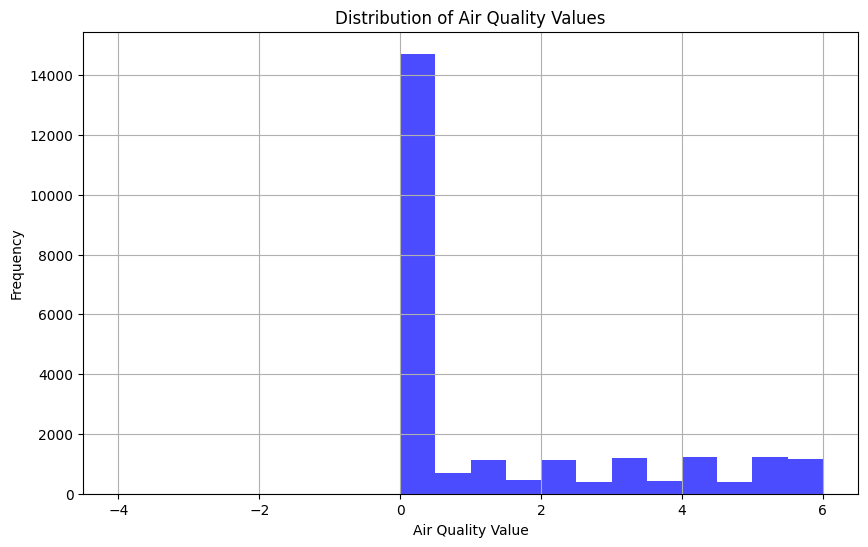

In [ ]:
# Specify the custom range for your data
value_range = (-4, 6)  # Adjust the range as per your data

# Visualize the distribution of air quality values using a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Value'], bins=20, range=value_range, color='blue', alpha=0.7)
plt.title('Distribution of Air Quality Values')
plt.xlabel('Air Quality Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# 2.2 Checking the Frequency of Each Pollutant

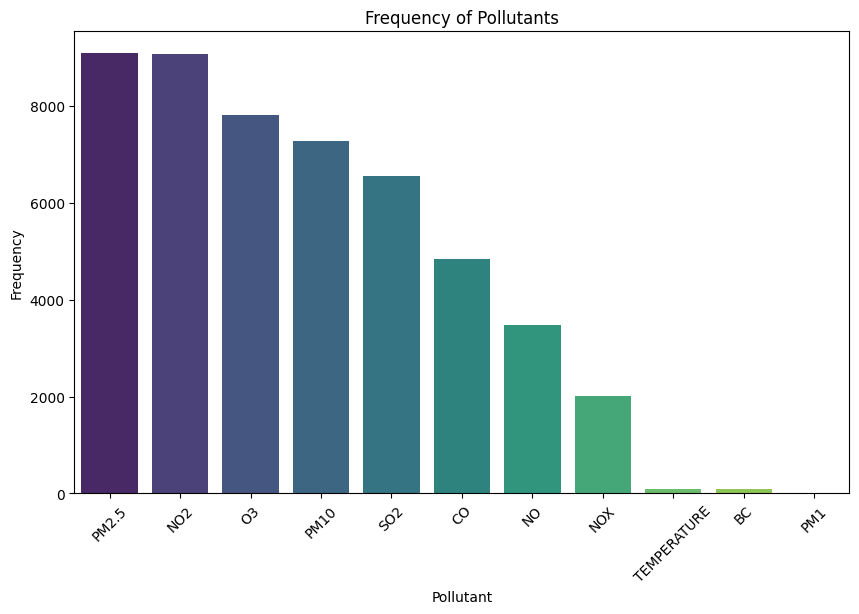

In [ ]:
# Calculate the frequency of each pollutant
pollutant_counts = data['Pollutant'].value_counts()

# Visualize the frequency of pollutants
plt.figure(figsize=(10, 6))
sns.barplot(x=pollutant_counts.index, y=pollutant_counts.values, palette='viridis')
plt.title('Frequency of Pollutants')
plt.xlabel('Pollutant')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# 2.3  Calculating the AIR Quality index
I defined AQI breakpoints and sub-indices for each pollutant to represent different pollution concentration ranges.

I calculated a sub-index for each pollutant based on its value and associated breakpoints, which quantifies air quality for that specific pollutant.

To determine the overall AQI for each row, I selected the highest sub-index among the pollutants present in that row. This approach ensures that the overall AQI reflects the most influential pollutant.

I displayed AQI values for each row, providing a holistic measure of air quality that considers multiple pollutants.

In [ ]:
# Define AQI breakpoints and corresponding sub-indices for each pollutant
pollutant_breakpoints = {
    'PM10': [0, 54, 154, 254, 354, 424, 504, 604],
    'PM2.5': [0, 12, 35.4, 55.4, 150.4, 250.4, 350.4, 500.4],
    'O3': [0, 54, 70, 85, 105, 200, 504],
    'SO2': [0, 35, 75, 185, 304, 604],
    'NO2': [0, 53, 100, 360, 649, 1249],
    'CO': [0, 4.4, 9.4, 12.4, 15.4, 30.4, 50.4, 60.4],
    'NO': [0, 53, 100, 360, 649, 1249],
    'NOX': [0, 53, 100, 360, 649, 1249],
    'TEMPERATURE': [0, 50],
    'BC': [0, 50],
    'PM1': [0, 12, 35.4, 55.4, 150.4, 250.4, 350.4, 500.4]
}

# Function to calculate sub-index for a specific pollutant
def calculate_sub_index(pollutant, value):
    breakpoints = pollutant_breakpoints.get(pollutant)
    if not breakpoints:
        return None

    for i in range(len(breakpoints) - 1):
        if breakpoints[i] <= value <= breakpoints[i + 1]:
            return (i + 1) * ((breakpoints[i + 1] - breakpoints[i]) / 10) + (i * 50)

# Calculate sub-indices for each pollutant
for pollutant in data['Pollutant'].unique():
    data[pollutant + '_SubIndex'] = data.apply(lambda row: calculate_sub_index(pollutant, row['Value']), axis=1)

# Calculate the overall AQI by selecting the maximum sub-index among pollutants
data['AQI'] = data[['PM10_SubIndex', 'PM2.5_SubIndex', 'O3_SubIndex', 'SO2_SubIndex', 'NO2_SubIndex', 'CO_SubIndex', 'NO_SubIndex', 'NOX_SubIndex', 'TEMPERATURE_SubIndex', 'BC_SubIndex', 'PM1_SubIndex']].max(axis=1)

# Print the AQI values for each row
print(data[['Country Label', 'Pollutant', 'Value', 'AQI']])


      Country Label Pollutant      Value    AQI
0            France      PM10  14.750000  151.2
1            France     PM2.5   6.980000   51.0
2            France        O3  38.930000  262.0
3            France      PM10  17.500000  207.5
4            France      PM10   7.350000   51.0
...             ...       ...        ...    ...
50260  South Africa        CO   0.510000    5.4
50261  South Africa       SO2   0.005830    5.4
50262  South Africa        CO   0.070000    5.4
50263  South Africa      PM10  42.169000  262.0
50264  South Africa       SO2   0.016043    5.4

[50265 rows x 4 columns]


# 2.3.1 Confirming the New columns

In [ ]:
data



,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label,...,O3_SubIndex,SO2_SubIndex,NO2_SubIndex,CO_SubIndex,NO_SubIndex,NOX_SubIndex,TEMPERATURE_SubIndex,BC_SubIndex,PM1_SubIndex,AQI
0,FR,NaN,FR10028,"50.981663999475, 2.143056",PM10,EEA France,µg/m³,14.750000,2018-04-25T01:00:00+01:00,France,...,5.4,3.5,5.3,151.20,5.3,5.3,5.0,5.0,54.68,151.2
1,FR,NaN,FR11025,"50.6294439994737, 3.090833",PM2.5,EEA France,µg/m³,6.980000,2018-04-25T01:00:00+01:00,France,...,5.4,3.5,5.3,51.00,5.3,5.3,5.0,5.0,1.20,51.0
2,FR,NaN,FR34038,"46.8147189994643, 2.610806",O3,EEA France,µg/m³,38.930000,2018-04-25T01:00:00+01:00,France,...,5.4,58.0,5.3,262.00,5.3,5.3,5.0,5.0,106.00,262.0
3,FR,NaN,FR34047,"48.7608889994679, 1.233781",PM10,EEA France,µg/m³,17.500000,2018-04-25T01:00:00+01:00,France,...,5.4,3.5,5.3,207.50,5.3,5.3,5.0,5.0,54.68,207.5
4,FR,NaN,FR10026,"50.9508329994749, 1.8425",PM10,EEA France,µg/m³,7.350000,2018-04-25T01:00:00+01:00,France,...,5.4,3.5,5.3,51.00,5.3,5.3,5.0,5.0,1.20,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50260,ZA,Sedibeng,Sebokeng,"-26.587334, 27.841022",CO,South Africa,ppm,0.510000,2021-10-13T14:00:00+01:00,South Africa,...,5.4,3.5,5.3,0.44,5.3,5.3,5.0,5.0,1.20,5.4
50261,ZA,Sedibeng,Sebokeng,"-26.587334, 27.841022",SO2,South Africa,ppm,0.005830,2022-05-11T09:00:00+01:00,South Africa,...,5.4,3.5,5.3,0.44,5.3,5.3,5.0,5.0,1.20,5.4
50262,ZA,Nelson Mandela Bay Metro,Uitenhage,"-33.763778, 25.417306",CO,South Africa,ppm,0.070000,2022-03-02T07:00:00+00:00,South Africa,...,5.4,3.5,5.3,0.44,5.3,5.3,5.0,5.0,1.20,5.4
50263,ZA,King Cetshwayo,eNseleni - RBCAA,"-28.662989, 32.017791",PM10,South Africa,µg/m³,42.169000,2022-02-21T03:00:00+00:00,South Africa,...,5.4,58.0,5.3,262.00,5.3,5.3,5.0,5.0,106.00,262.0


# 2.4 Setting up Region
Printing the Names of the Distinct countries as we already know that there are 115 Countries

In [ ]:
# Get the distinct countries from the 'Country Label' column
distinct_countries = data['Country Label'].unique()

# Print the distinct countries
print("Distinct Countries:")
for country in distinct_countries:
    print(country)


Distinct Countries:
France
United Kingdom
Greece
Hong Kong, China
Croatia
Hungary
Ireland
Israel
India
Iceland
Italy
Japan
China
Germany
Spain
Finland
Colombia
Cyprus
Czech Republic
Canada
Switzerland
Côte d'Ivoire
Chile
Andorra
United Arab Emirates
Argentina
Austria
Australia
Bosnia and Herzegovina
Belgium
Bulgaria
Brazil
Lithuania
Luxembourg
Latvia
Montenegro
Macedonia, The former Yugoslav Rep. of
Mongolia
Mexico
Netherlands
United States
Viet Nam
Kosovo
South Africa
Thailand
Turkey
Trinidad and Tobago
Taiwan, China
Norway
Nepal
Peru
Poland
Portugal
Romania
Serbia
Sweden
Slovenia
Slovakia
Kuwait
Myanmar
Uganda
New Zealand
Pakistan
Sudan, The Republic of
Nicaragua
Denmark
Algeria
Ecuador
Estonia
Bangladesh
Burkina Faso
Gibraltar
Armenia
Iraq
Lao People's Dem. Rep.
Jordan
Moldova, Republic of
Malta
Uzbekistan
Guinea
Ghana
Malaysia
Nigeria
Qatar
Sri Lanka
Azerbaijan
Bermuda
Antarctica
Indonesia
Ethiopia
Kenya
Kyrgyzstan
Korea, Republic of
Guatemala
Vatican City
Curacao
Turkmenistan
Cong

# 2.4.1 Defining a dictionary to map countries to continents


In [ ]:
country_to_continent = {
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'Greece': 'Europe',
    'Hong Kong, China': 'Asia',
    'Croatia': 'Europe',
    'Hungary': 'Europe',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'India': 'Asia',
    'Iceland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'China': 'Asia',
    'Germany': 'Europe',
    'Spain': 'Europe',
    'Finland': 'Europe',
    'Colombia': 'South America',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Canada': 'North America',
    'Switzerland': 'Europe',
    'Chile': 'South America',
    'Andorra': 'Europe',
    'United Arab Emirates': 'Asia',
    'Argentina': 'South America',
    'Austria': 'Europe',
    'Australia': 'Australia',
    'Bosnia and Herzegovina': 'Europe',
    'Belgium': 'Europe',
    'Bulgaria': 'Europe',
    'Brazil': 'South America',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Latvia': 'Europe',
    'Montenegro': 'Europe',
    'Macedonia, The former Yugoslav Rep. of': 'Europe',
    'Mongolia': 'Asia',
    'Mexico': 'North America',
    'Netherlands': 'Europe',
    'United States': 'North America',
    'Viet Nam': 'Asia',
    'nan': 'Unknown',
    'South Africa': 'Africa',
    'Thailand': 'Asia',
    'Turkey': 'Asia',
    'Trinidad and Tobago': 'North America',
    'Taiwan, China': 'Asia',
    'Norway': 'Europe',
    'Nepal': 'Asia',
    'Peru': 'South America',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Serbia': 'Europe',
    'Sweden': 'Europe',
    'Slovenia': 'Europe',
    'Slovakia': 'Europe',
    'Myanmar': 'Asia',
    'Uganda': 'Africa',
    'New Zealand': 'Australia',
    'Pakistan': 'Asia',
    'Sudan, The Republic of': 'Africa',
    'Nicaragua': 'North America',
    'Denmark': 'Europe',
    'Algeria': 'Africa',
    'Ecuador': 'South America',
    'Estonia': 'Europe',
    'Bangladesh': 'Asia',
    'Gibraltar': 'Europe',
    'Armenia': 'Asia',
    'Iraq': 'Asia',
    'Jordan': 'Asia',
    'Moldova, Republic of': 'Europe',
    'Malta': 'Europe',
    'Uzbekistan': 'Asia',
    'Guinea': 'Africa',
    'Ghana': 'Africa',
    'Malaysia': 'Asia',
    'Nigeria': 'Africa',
    'Qatar': 'Asia',
    'Kuwait': 'Asia',
    'Sri Lanka': 'Asia',
    'Bermuda': 'North America',
    'Indonesia': 'Asia',
    'Ethiopia': 'Africa',
    'Kenya': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Korea, Republic of': 'Asia',
    'Guatemala': 'North America',
    'Congo, Democratic Republic of the': 'Africa',
    'Belize': 'North America',
    'Serbia and Montenegro': 'Europe',
    'Russian Federation': 'Europe',
    'Saudi Arabia': 'Asia',
    'Gabon': 'Africa',
    'Azerbaijan': 'Asia',
    'Philippines': 'Asia',
    'Chad': 'Africa',
    'Afghanistan': 'Asia',
    'Turkmenistan': 'Asia',
    'Bahrain': 'Asia',
    'Morocco': 'Africa',
    'Egypt': 'Africa',
    'Central African Republic': 'Africa',
    'Madagascar': 'Africa',
    'Tajikistan': 'Asia',
    'Mali': 'Africa',
    'Singapore': 'Asia',
    'Rwanda': 'Africa',
    'Antigua and Barbuda': 'North America',
    'USSR': 'Europe',
    'Costa Rica': 'North America',
    'Kazakhstan': 'Asia'
}

# Map countries to continents and create a new 'Region' column
data['Region'] = data['Country Label'].map(country_to_continent)

# Print a sample of the dataset with the new 'Region' column
print(data[['Country Label', 'Region']])


      Country Label  Region
0            France  Europe
1            France  Europe
2            France  Europe
3            France  Europe
4            France  Europe
...             ...     ...
50260  South Africa  Africa
50261  South Africa  Africa
50262  South Africa  Africa
50263  South Africa  Africa
50264  South Africa  Africa

[50265 rows x 2 columns]


# 2.4.2 Mapping the Mapped out countries

In [ ]:
country_to_region = {
    'CI': 'Africa',  # Côte d'Ivoire
    'LA': 'Asia'  # Lao People's Dem. Rep.
}

# 2.4.3  Printing the dataset

In [ ]:
data


,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label,...,SO2_SubIndex,NO2_SubIndex,CO_SubIndex,NO_SubIndex,NOX_SubIndex,TEMPERATURE_SubIndex,BC_SubIndex,PM1_SubIndex,AQI,Region
0,FR,NaN,FR10028,"50.981663999475, 2.143056",PM10,EEA France,µg/m³,14.750000,2018-04-25T01:00:00+01:00,France,...,3.5,5.3,151.20,5.3,5.3,5.0,5.0,54.68,151.2,Europe
1,FR,NaN,FR11025,"50.6294439994737, 3.090833",PM2.5,EEA France,µg/m³,6.980000,2018-04-25T01:00:00+01:00,France,...,3.5,5.3,51.00,5.3,5.3,5.0,5.0,1.20,51.0,Europe
2,FR,NaN,FR34038,"46.8147189994643, 2.610806",O3,EEA France,µg/m³,38.930000,2018-04-25T01:00:00+01:00,France,...,58.0,5.3,262.00,5.3,5.3,5.0,5.0,106.00,262.0,Europe
3,FR,NaN,FR34047,"48.7608889994679, 1.233781",PM10,EEA France,µg/m³,17.500000,2018-04-25T01:00:00+01:00,France,...,3.5,5.3,207.50,5.3,5.3,5.0,5.0,54.68,207.5,Europe
4,FR,NaN,FR10026,"50.9508329994749, 1.8425",PM10,EEA France,µg/m³,7.350000,2018-04-25T01:00:00+01:00,France,...,3.5,5.3,51.00,5.3,5.3,5.0,5.0,1.20,51.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50260,ZA,Sedibeng,Sebokeng,"-26.587334, 27.841022",CO,South Africa,ppm,0.510000,2021-10-13T14:00:00+01:00,South Africa,...,3.5,5.3,0.44,5.3,5.3,5.0,5.0,1.20,5.4,Africa
50261,ZA,Sedibeng,Sebokeng,"-26.587334, 27.841022",SO2,South Africa,ppm,0.005830,2022-05-11T09:00:00+01:00,South Africa,...,3.5,5.3,0.44,5.3,5.3,5.0,5.0,1.20,5.4,Africa
50262,ZA,Nelson Mandela Bay Metro,Uitenhage,"-33.763778, 25.417306",CO,South Africa,ppm,0.070000,2022-03-02T07:00:00+00:00,South Africa,...,3.5,5.3,0.44,5.3,5.3,5.0,5.0,1.20,5.4,Africa
50263,ZA,King Cetshwayo,eNseleni - RBCAA,"-28.662989, 32.017791",PM10,South Africa,µg/m³,42.169000,2022-02-21T03:00:00+00:00,South Africa,...,58.0,5.3,262.00,5.3,5.3,5.0,5.0,106.00,262.0,Africa


# 2.5 Checking Pollutants level by region

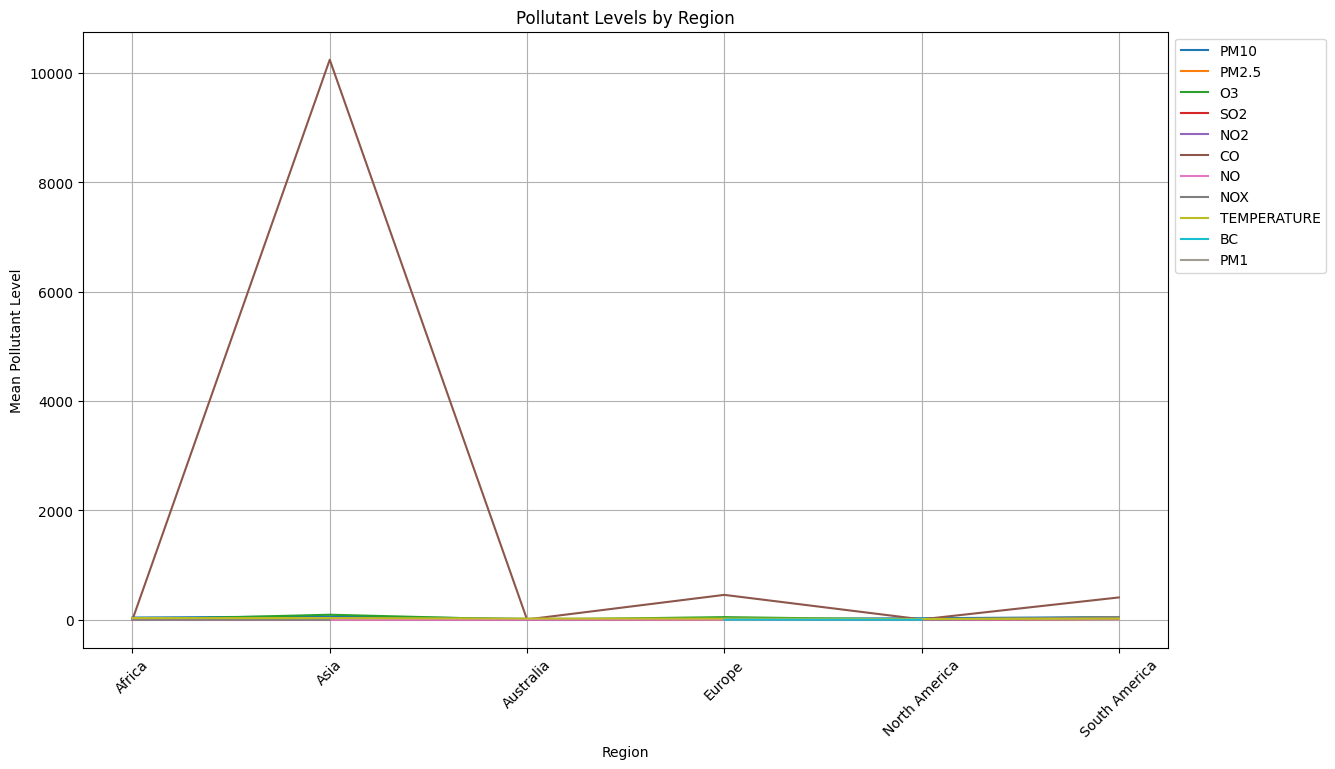

Pollutant            BC            CO         NO        NO2        NOX  \
Region                                                                   
Africa              NaN      1.089267   0.036426   0.011045   0.011839   
Asia                NaN  10244.428089   0.001084  14.135092   0.005530   
Australia           NaN      4.657548   1.986215   0.129946        NaN   
Europe         0.641393    454.149221   4.571017  12.570379  15.929880   
North America  0.446897      6.193000   0.007562   0.063339   0.014994   
South America       NaN    407.113236  18.803333  22.239693  49.426667   

Pollutant             O3       PM1       PM10      PM2.5        SO2  \
Region                                                                
Africa          0.097786       NaN  39.248615  21.983913   0.027362   
Asia           91.067626       NaN  59.285857  25.254515   7.589501   
Australia       0.020492       NaN  15.170028   6.218016   0.049333   
Europe         47.206803  1.533508  13.937852   7.74

In [ ]:
# Define the 11 distinct pollutants
distinct_pollutants = ['PM10', 'PM2.5', 'O3', 'SO2', 'NO2', 'CO', 'NO', 'NOX', 'TEMPERATURE', 'BC', 'PM1']

# Define a custom color palette with distinct colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#a19d92']

# Group the data by 'Region' and 'Pollutant' and calculate the mean pollutant levels
region_pollutant_stats = data.groupby(['Region', 'Pollutant'])['Value'].mean().unstack()

# Plot pollutant levels for each region using distinct colors
plt.figure(figsize=(14, 8))
for i, pollutant in enumerate(distinct_pollutants):
    plt.plot(region_pollutant_stats.index, region_pollutant_stats[pollutant], label=pollutant, color=custom_colors[i])

plt.title('Pollutant Levels by Region')
plt.xlabel('Region')
plt.ylabel('Mean Pollutant Level')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid()
plt.show()

print(region_pollutant_stats)

# 2.6 Checking Pollutant level by region

Region: Africa, PM10 Level: 39.25
Region: Asia, PM10 Level: 59.29
Region: Australia, PM10 Level: 15.17
Region: Europe, PM10 Level: 13.94
Region: North America, PM10 Level: 26.70
Region: South America, PM10 Level: 48.19


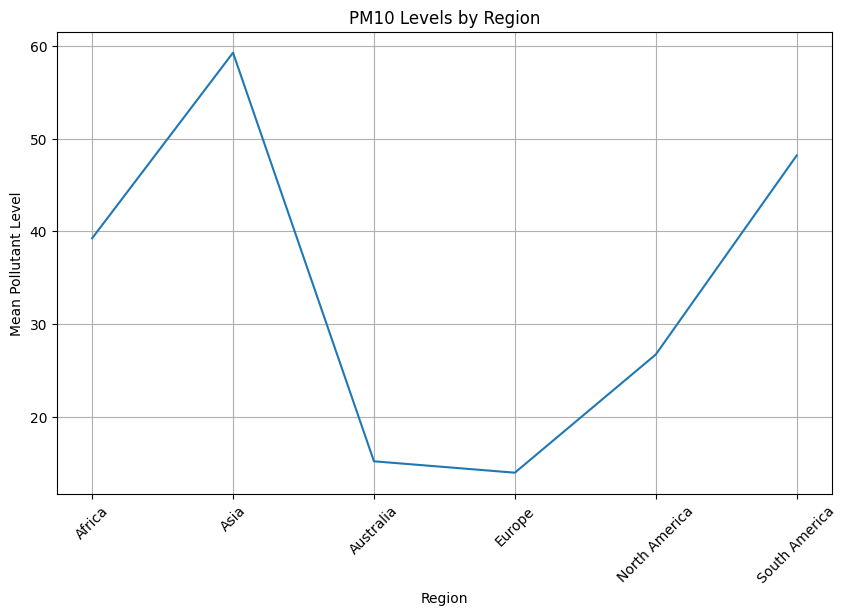

Region: Africa, PM2.5 Level: 21.98
Region: Asia, PM2.5 Level: 25.25
Region: Australia, PM2.5 Level: 6.22
Region: Europe, PM2.5 Level: 7.75
Region: North America, PM2.5 Level: 10.25
Region: South America, PM2.5 Level: 23.15


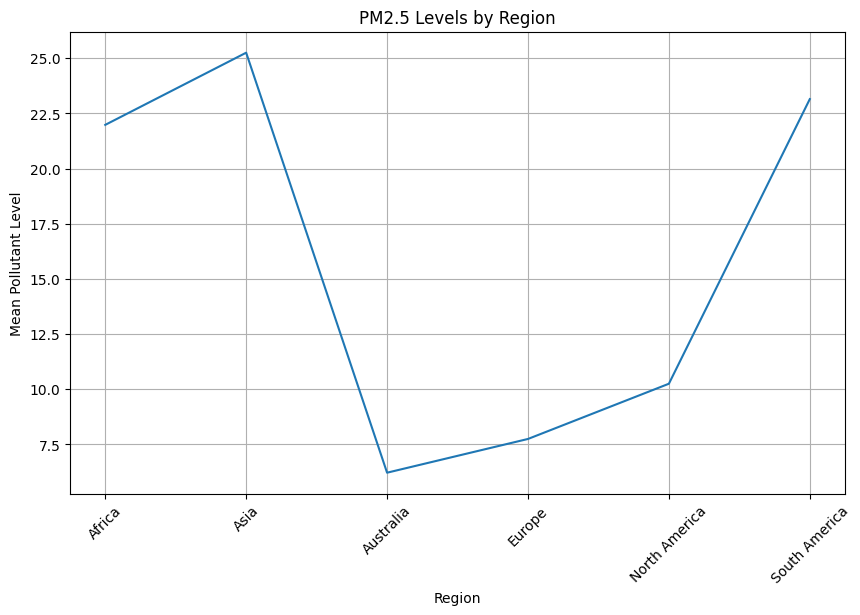

Region: Africa, O3 Level: 0.10
Region: Asia, O3 Level: 91.07
Region: Australia, O3 Level: 0.02
Region: Europe, O3 Level: 47.21
Region: North America, O3 Level: 0.07
Region: South America, O3 Level: 41.41


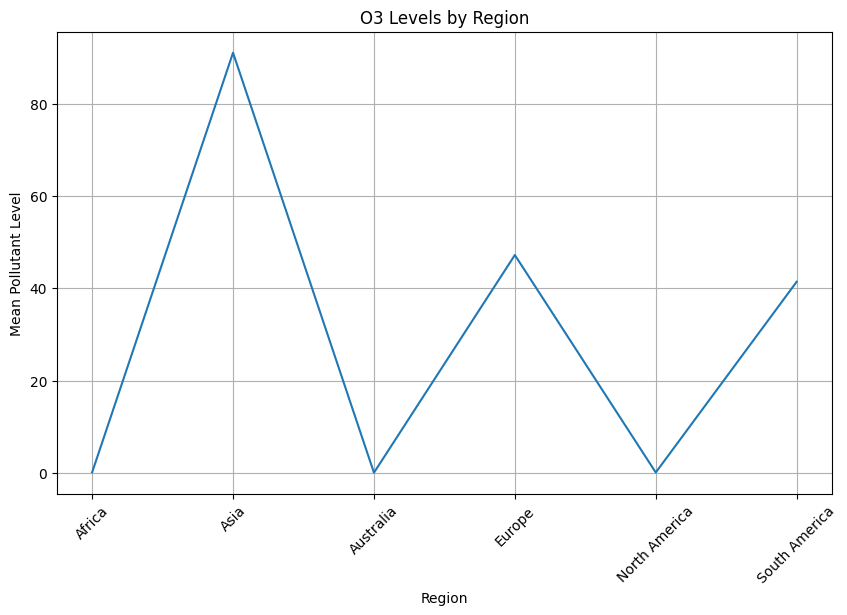

Region: Africa, SO2 Level: 0.03
Region: Asia, SO2 Level: 7.59
Region: Australia, SO2 Level: 0.05
Region: Europe, SO2 Level: 10.87
Region: North America, SO2 Level: 0.01
Region: South America, SO2 Level: 10.68


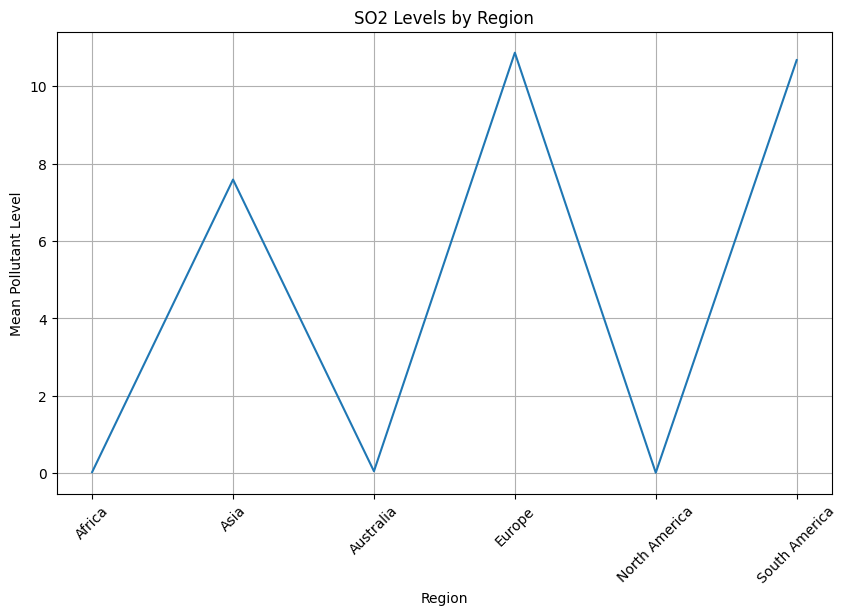

Region: Africa, NO2 Level: 0.01
Region: Asia, NO2 Level: 14.14
Region: Australia, NO2 Level: 0.13
Region: Europe, NO2 Level: 12.57
Region: North America, NO2 Level: 0.06
Region: South America, NO2 Level: 22.24


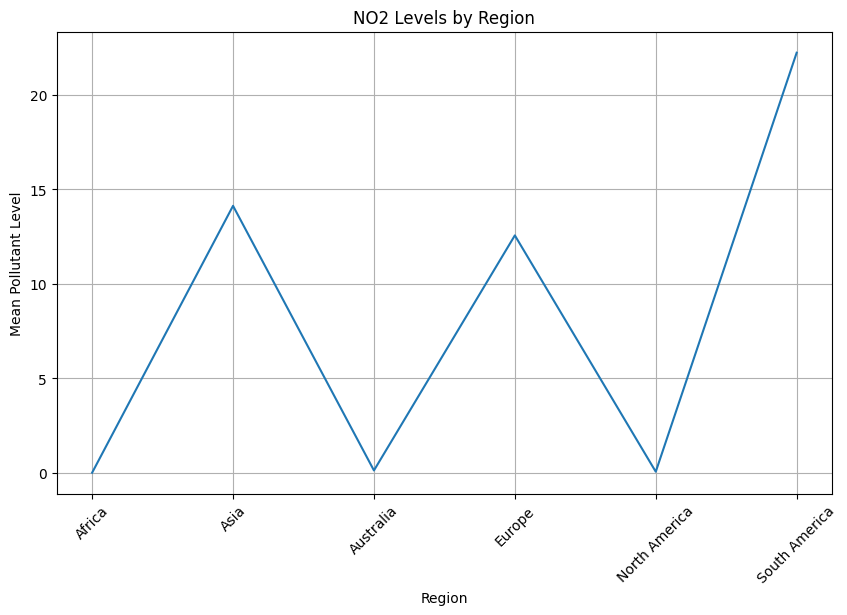

Region: Africa, CO Level: 1.09
Region: Asia, CO Level: 10244.43
Region: Australia, CO Level: 4.66
Region: Europe, CO Level: 454.15
Region: North America, CO Level: 6.19
Region: South America, CO Level: 407.11


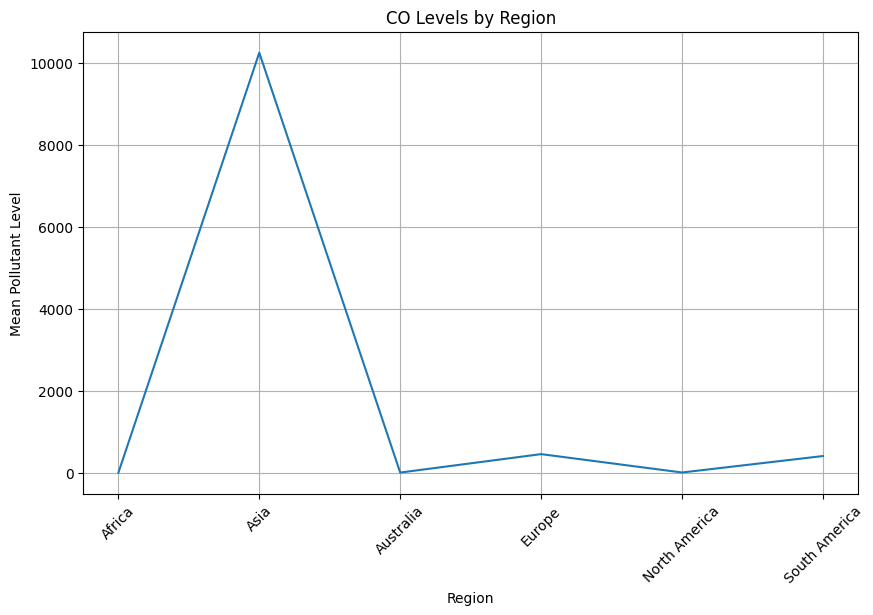

Region: Africa, NO Level: 0.04
Region: Asia, NO Level: 0.00
Region: Australia, NO Level: 1.99
Region: Europe, NO Level: 4.57
Region: North America, NO Level: 0.01
Region: South America, NO Level: 18.80


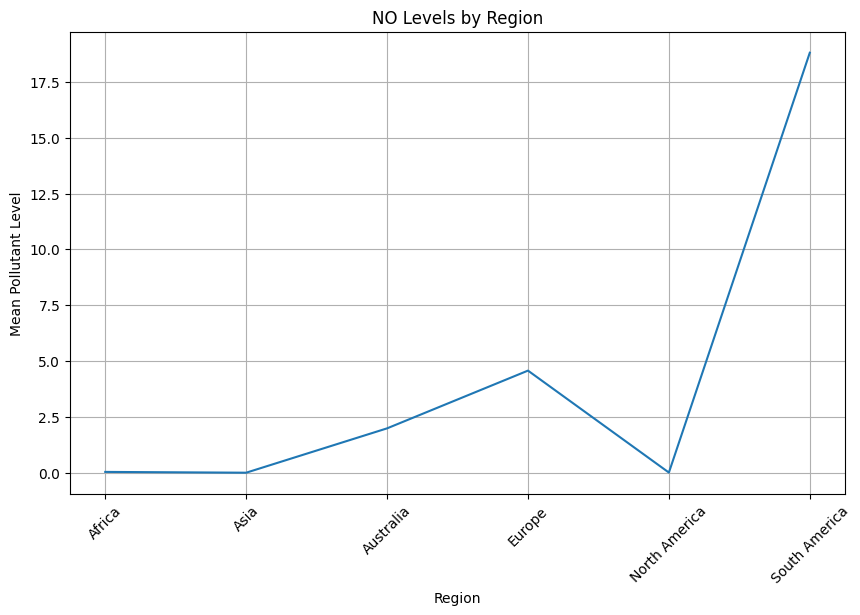

Region: Africa, NOX Level: 0.01
Region: Asia, NOX Level: 0.01
Region: Australia, NOX Level: nan
Region: Europe, NOX Level: 15.93
Region: North America, NOX Level: 0.01
Region: South America, NOX Level: 49.43


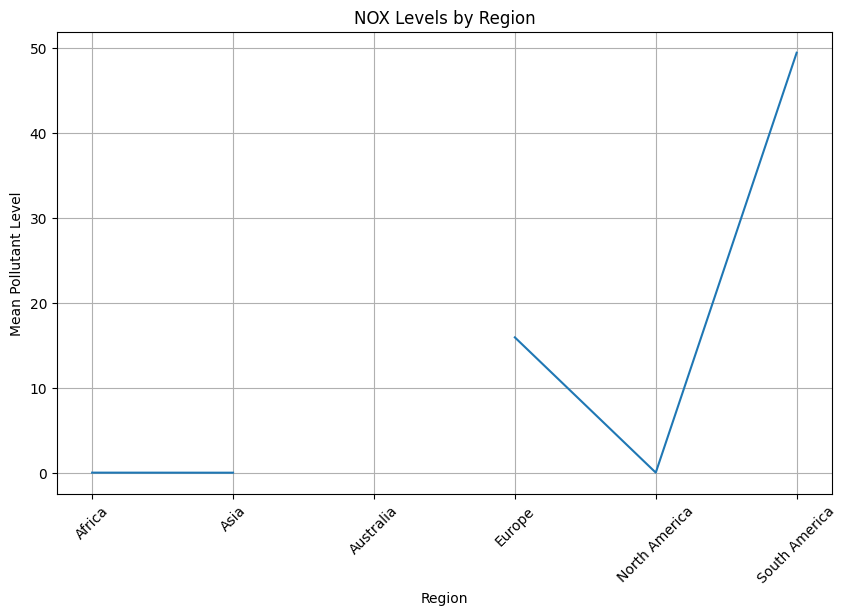

Region: Africa, TEMPERATURE Level: 29.23
Region: Asia, TEMPERATURE Level: 29.40
Region: Australia, TEMPERATURE Level: 20.86
Region: Europe, TEMPERATURE Level: 20.19
Region: North America, TEMPERATURE Level: 12.95
Region: South America, TEMPERATURE Level: 19.94


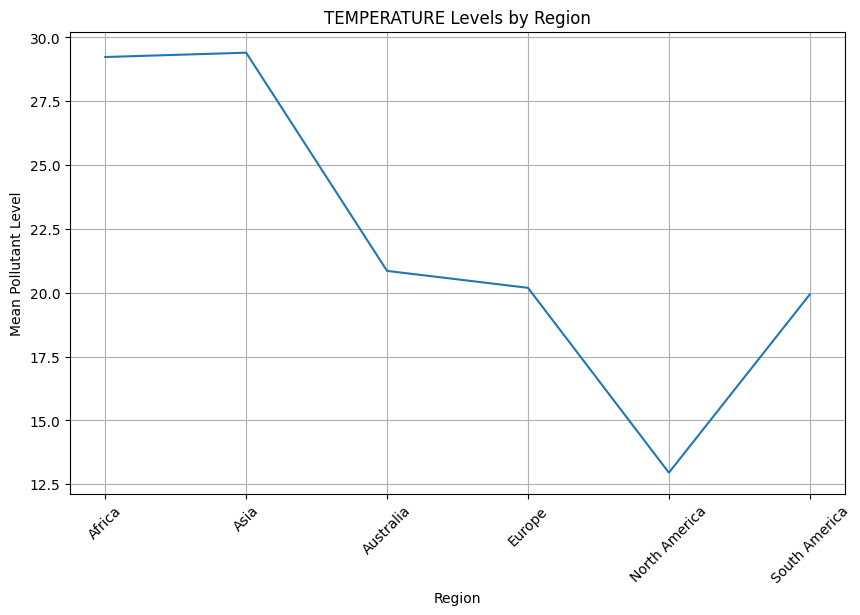

Region: Africa, BC Level: nan
Region: Asia, BC Level: nan
Region: Australia, BC Level: nan
Region: Europe, BC Level: 0.64
Region: North America, BC Level: 0.45
Region: South America, BC Level: nan


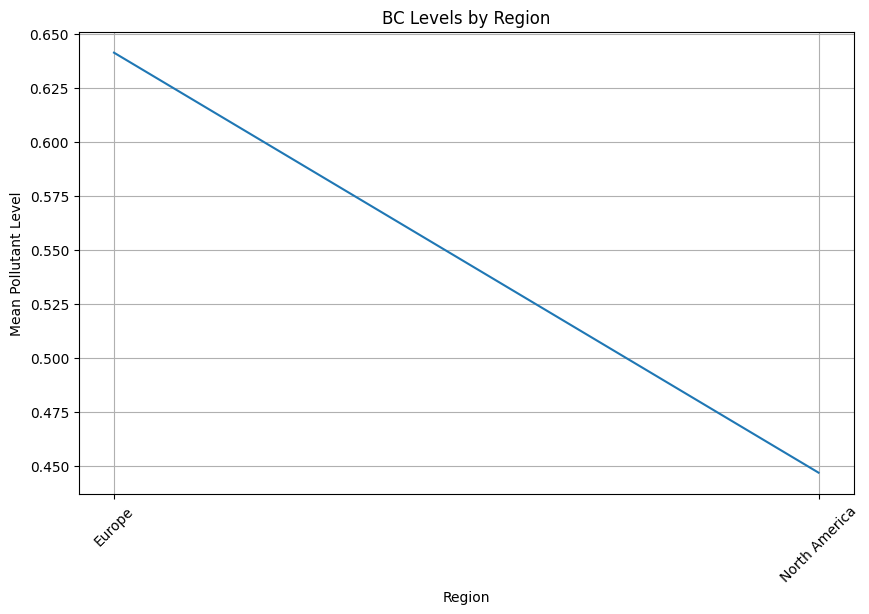

Region: Africa, PM1 Level: nan
Region: Asia, PM1 Level: nan
Region: Australia, PM1 Level: nan
Region: Europe, PM1 Level: 1.53
Region: North America, PM1 Level: nan
Region: South America, PM1 Level: nan


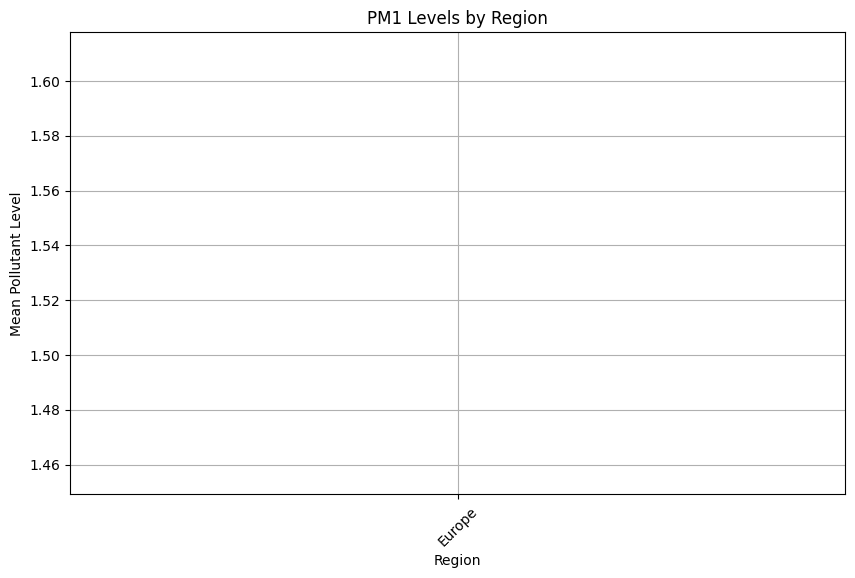

In [ ]:
# Define the 11 distinct pollutants
distinct_pollutants = ['PM10', 'PM2.5', 'O3', 'SO2', 'NO2', 'CO', 'NO', 'NOX', 'TEMPERATURE', 'BC', 'PM1']

# Group the data by 'Region' and 'Pollutant' and calculate the mean pollutant levels
region_pollutant_stats = data.groupby(['Region', 'Pollutant'])['Value'].mean().unstack()

# Create separate graphs for each pollutant
for pollutant in distinct_pollutants:
    plt.figure(figsize=(10, 6))
    plt.plot(region_pollutant_stats.index, region_pollutant_stats[pollutant])
    plt.title(f'{pollutant} Levels by Region')
    plt.xlabel('Region')
    plt.ylabel('Mean Pollutant Level')
    plt.xticks(rotation=45)
    plt.grid()

    # Print the pollutant levels
    for region, level in zip(region_pollutant_stats.index, region_pollutant_stats[pollutant]):
        print(f'Region: {region}, {pollutant} Level: {level:.2f}')

    plt.show()


# 2.7 Checking  the Top Pollutant by region

In [ ]:

# Group the data by 'Region' and 'Pollutant' and calculate the mean pollutant levels
region_pollutant_stats = data.groupby(['Region', 'Pollutant'])['Value'].mean().unstack()

# Find the top pollutant for each region
top_pollutants = region_pollutant_stats.idxmax(axis=1)

# Display the top pollutants in each region
print("Top Pollutants in Each Region:")
for region, pollutant in top_pollutants.items():
    print(f"{region}: {pollutant}")


Top Pollutants in Each Region:
Africa: PM10
Asia: CO
Australia: TEMPERATURE
Europe: CO
North America: PM10
South America: CO


# 2.8 Checking Top 5 Pollutant by region

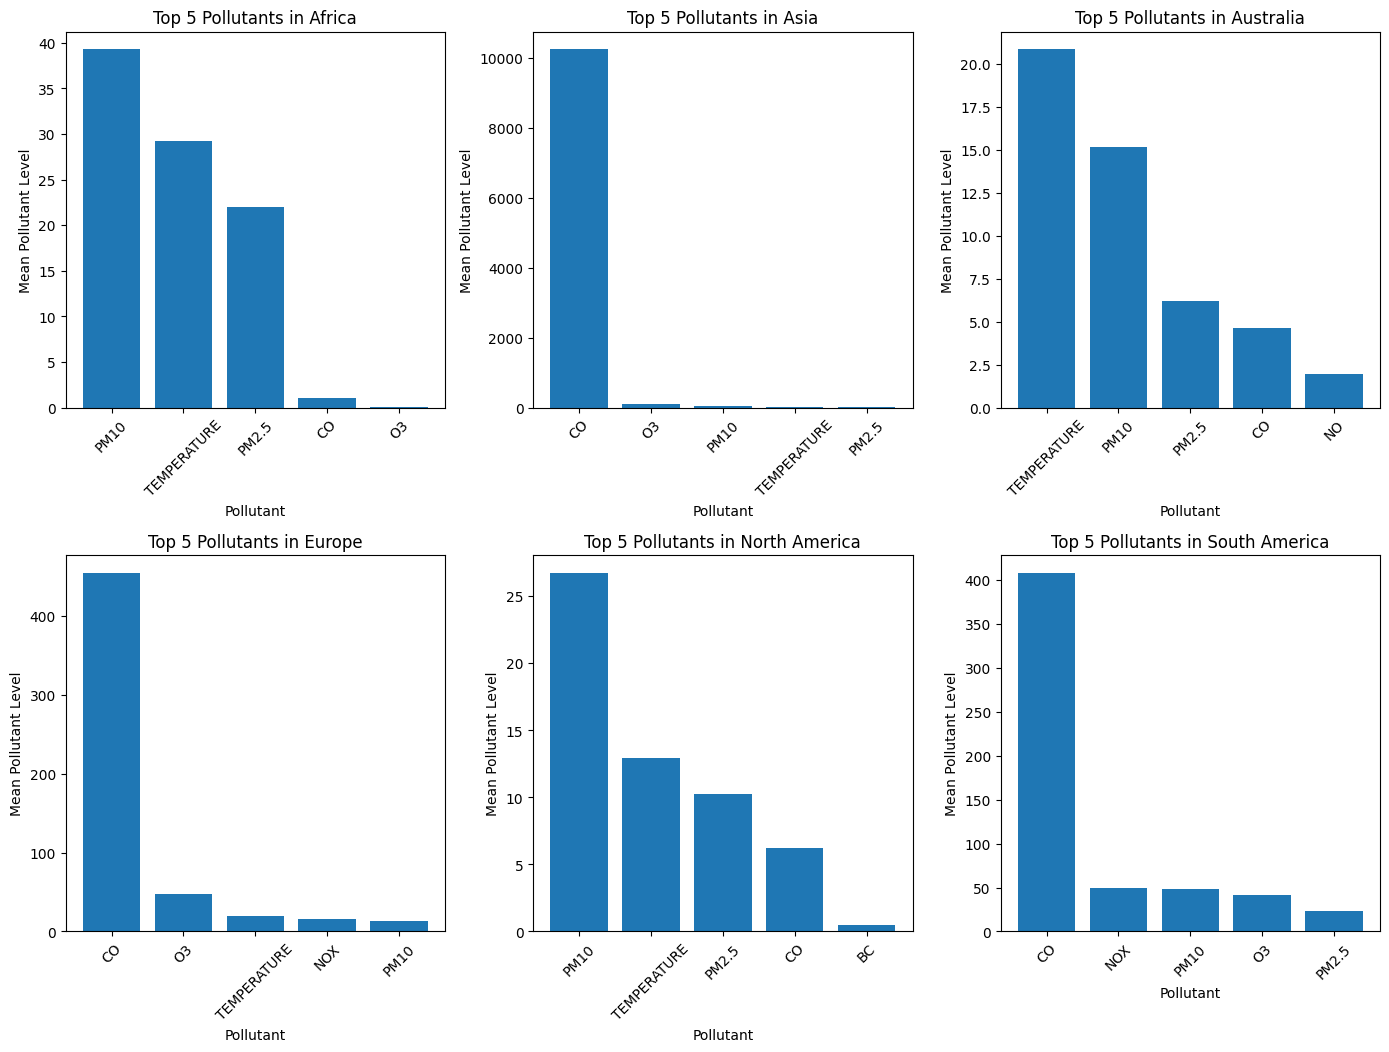

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the 11 distinct pollutants
distinct_pollutants = ['PM10', 'PM2.5', 'O3', 'SO2', 'NO2', 'CO', 'NO', 'NOX', 'TEMPERATURE', 'BC', 'PM1']

# Group the data by 'Region' and 'Pollutant' and calculate the mean pollutant levels
region_pollutant_stats = data.groupby(['Region', 'Pollutant'])['Value'].mean().unstack()

# Find the top 5 pollutants with the highest mean levels in each region
top_pollutants_by_region = region_pollutant_stats.apply(lambda x: x.nlargest(5).index, axis=1)

# Visualize the top 5 pollutants in each region
plt.figure(figsize=(14, 20))
for i, region in enumerate(top_pollutants_by_region.index, start=1):
    plt.subplot(4, 3, i)
    top_5_pollutants = top_pollutants_by_region.loc[region].values
    plt.bar(top_5_pollutants, region_pollutant_stats.loc[region][top_5_pollutants])
    plt.title(f'Top 5 Pollutants in {region}')
    plt.xlabel('Pollutant')
    plt.ylabel('Mean Pollutant Level')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# 2.9 Checking 5 Countires by region with highest pollutant levels

Region: Africa
Country: Rwanda
   Country Label  Value
14        Rwanda   62.4
Country: Egypt
  Country Label  Value
4         Egypt   39.5
Country: Ghana
  Country Label      Value
7         Ghana  21.599343
Country: Congo, Democratic Republic of the
                       Country Label  Value
3  Congo, Democratic Republic of the   18.0
Country: Gabon
  Country Label  Value
6         Gabon   17.0
Region: Asia
Country: Turkey
   Country Label         Value
48        Turkey  18120.441936
Country: India
   Country Label       Value
25         India  297.597269
Country: Singapore
   Country Label  Value
43     Singapore  282.9
Country: Bangladesh
   Country Label       Value
22    Bangladesh  209.566429
Country: China
   Country Label       Value
23         China  143.619404
Region: Australia
Country: New Zealand
   Country Label      Value
54   New Zealand  15.338389
Country: Australia
   Country Label     Value
53     Australia  6.401852
Region: Europe
Country: Cyprus
   Country Label  

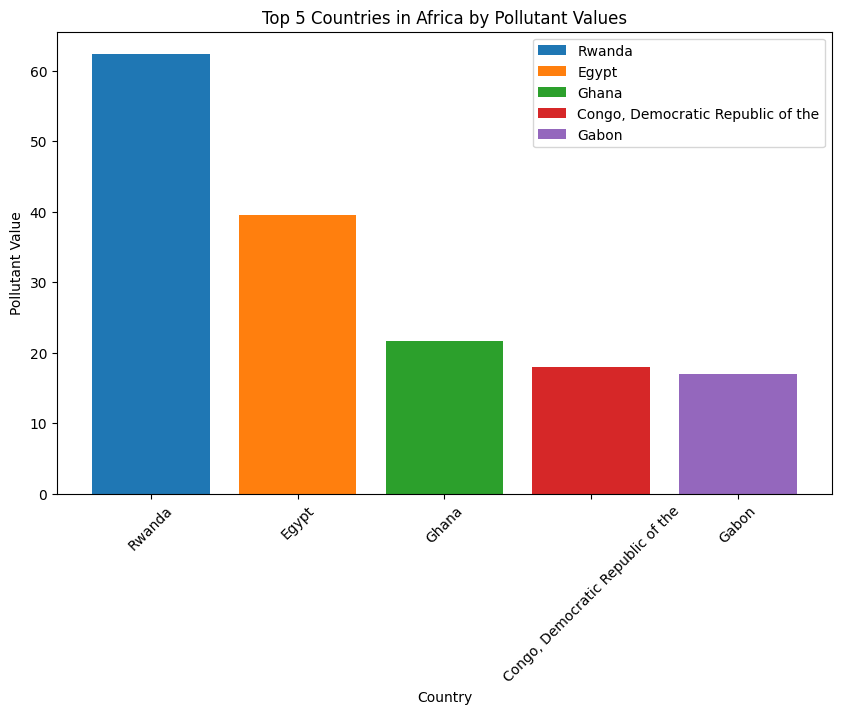

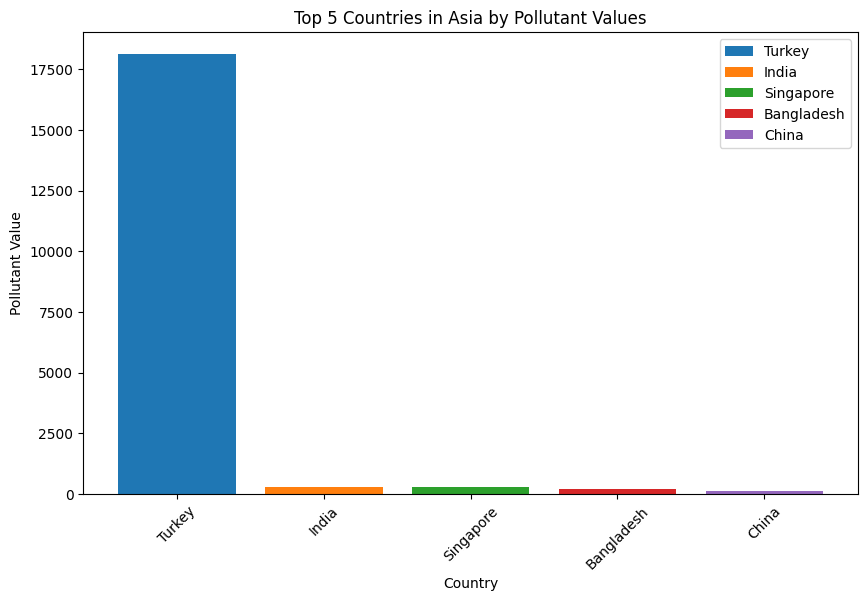

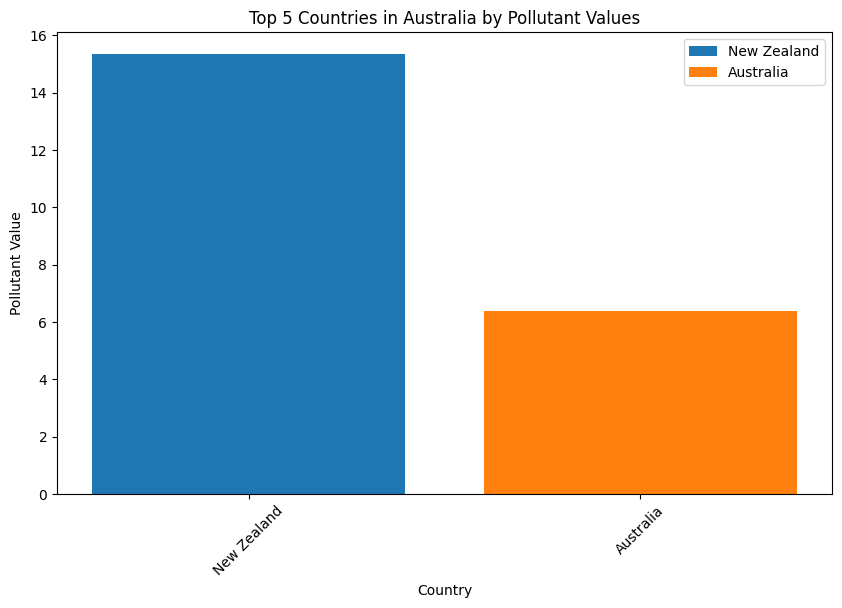

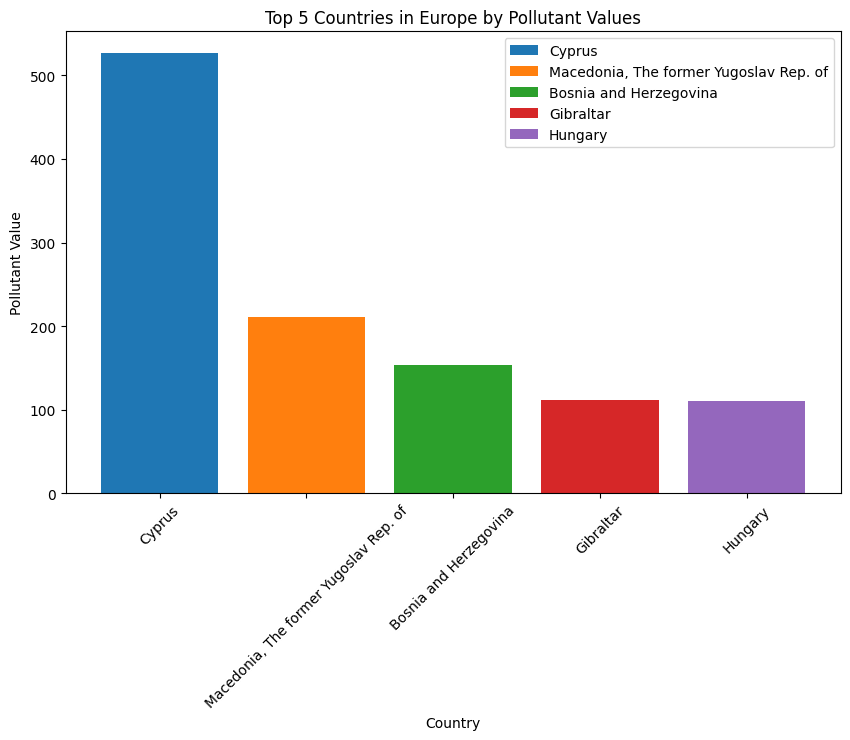

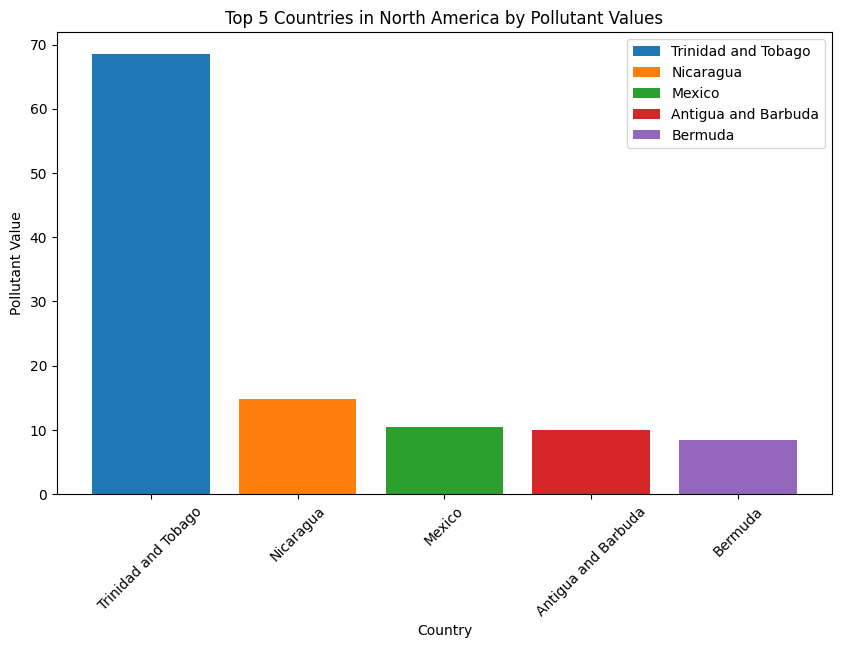

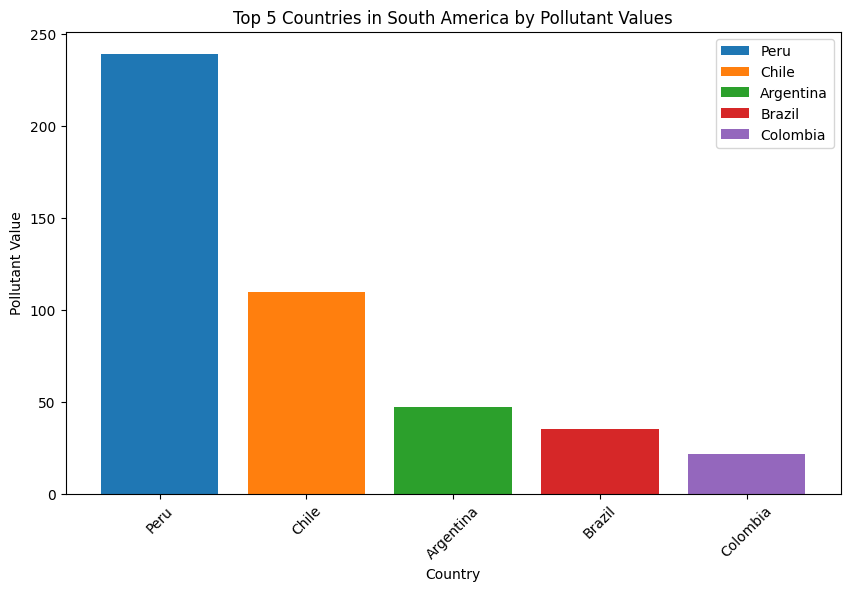

Top 5 Cities in Rwanda (Africa): []
Top 5 Cities in Egypt (Africa): []
Top 5 Cities in Ghana (Africa): ['Accra']
Top 5 Cities in Congo, Democratic Republic of the (Africa): []
Top 5 Cities in Gabon (Africa): []
Top 5 Cities in Turkey (Asia): ['Kastamonu', 'Bilecik', 'Kırklareli', 'Gümüşhane', 'Edirne']
Top 5 Cities in India (Asia): ['Delhi', 'Kolkata', 'Hyderabad', 'Kanpur', 'Chennai']
Top 5 Cities in Singapore (Asia): ['Singapore']
Top 5 Cities in Bangladesh (Asia): ['Dhaka']
Top 5 Cities in China (Asia): ['Causeway Bay', 'N.T.', 'Hong Kong', 'Tap Mun Police Post', 'Central']
Top 5 Cities in New Zealand (Australia): ['Christchurch', 'Waimate', 'Timaru', 'Rangiora', 'Kaiapoi']
Top 5 Cities in Australia (Australia): ['Kingsville', 'Mount Isa', 'Far North Queensland', 'North Queensland', 'Wangaratta']
Top 5 Cities in Cyprus (Europe): ['Ζύγι - Βιομηχανικός Σταθμός', 'Παραλίμνι - Κυκλοφοριακός Σταθμός', 'Λεμεσός - Κυκλοφοριακός Σταθμός', 'Λάρνακα - Κυκλοφοριακός Σταθμός', 'Μαρί - Βιομηχανι

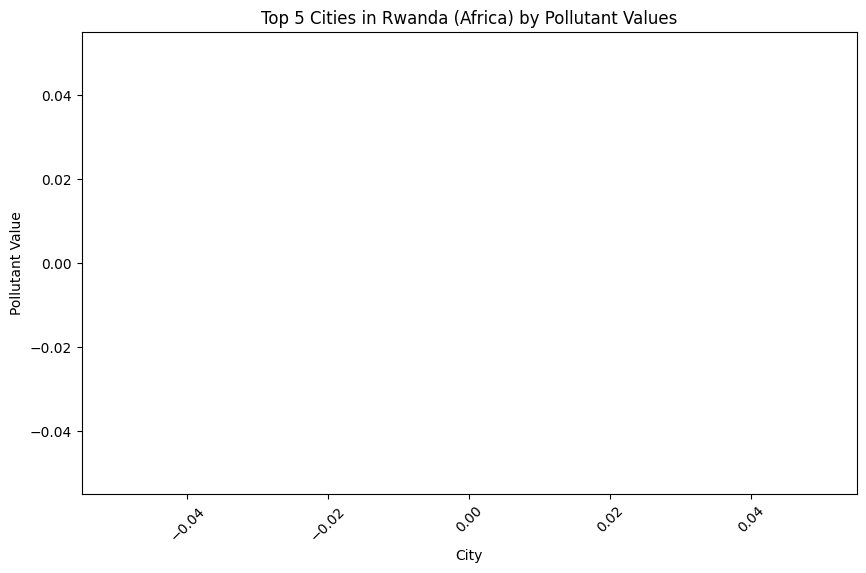

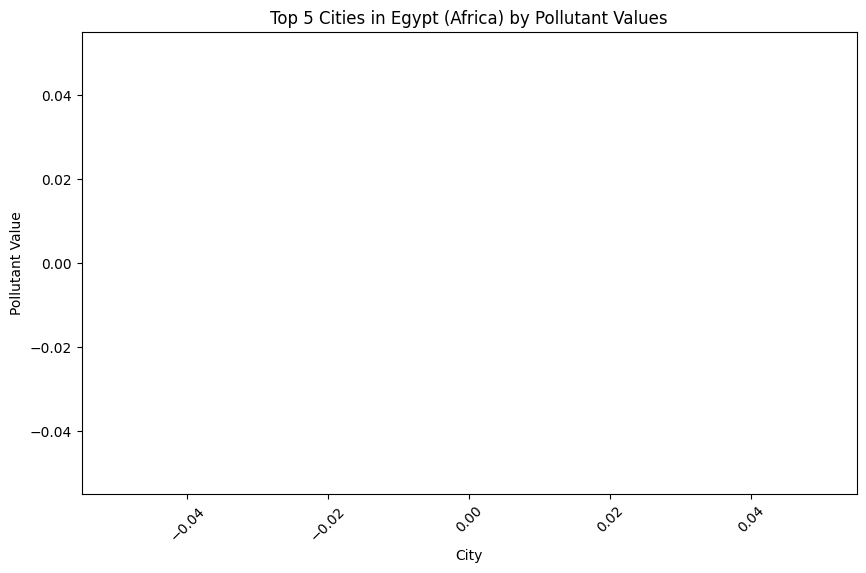

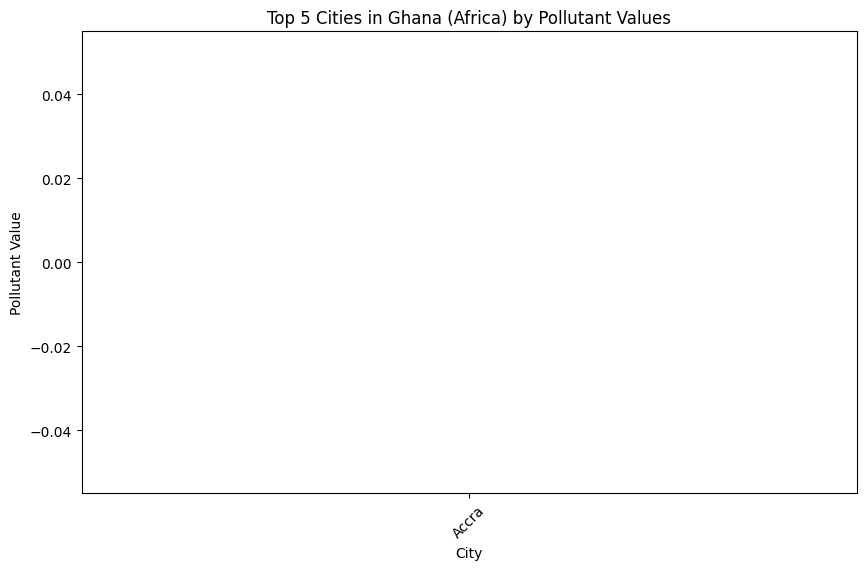

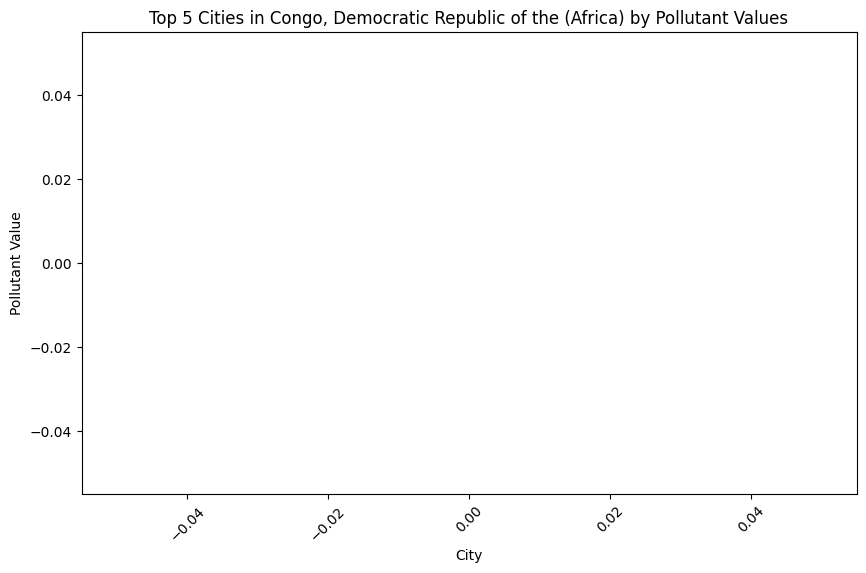

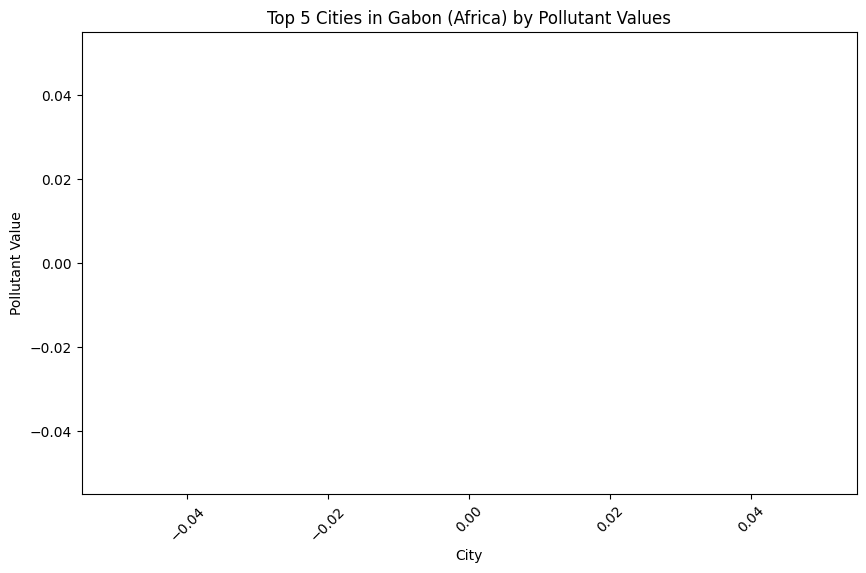

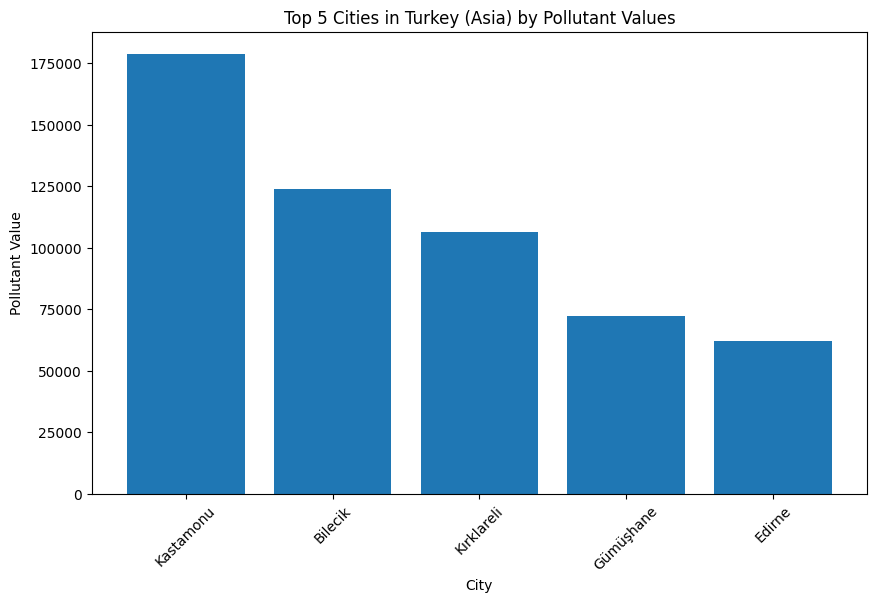

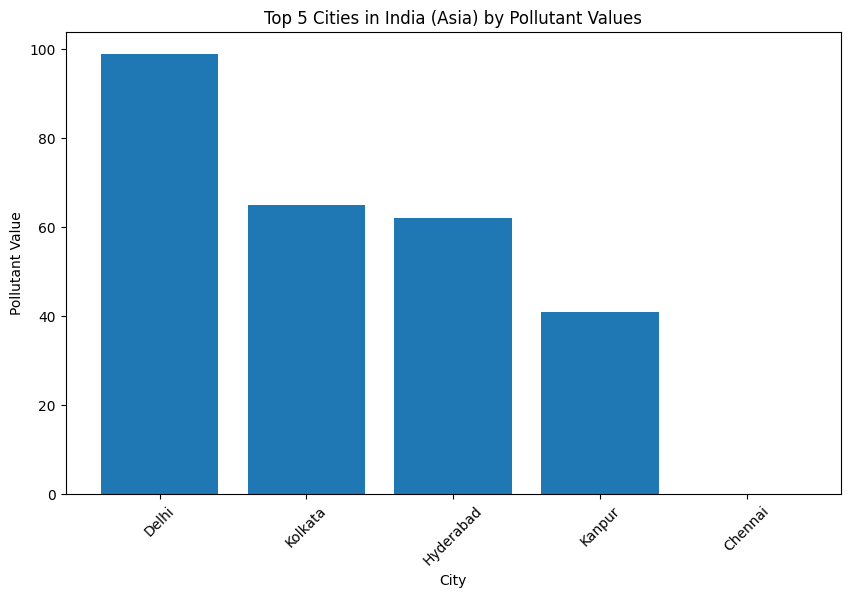

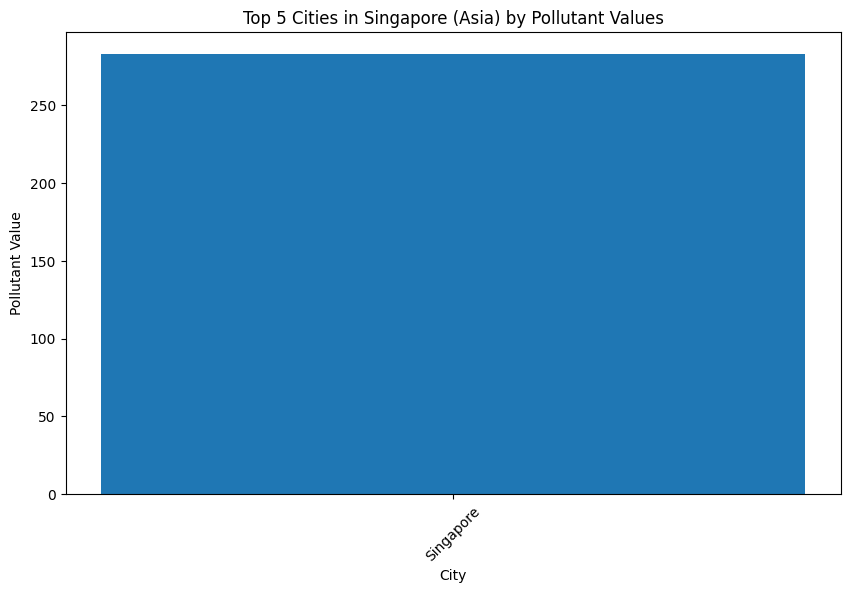

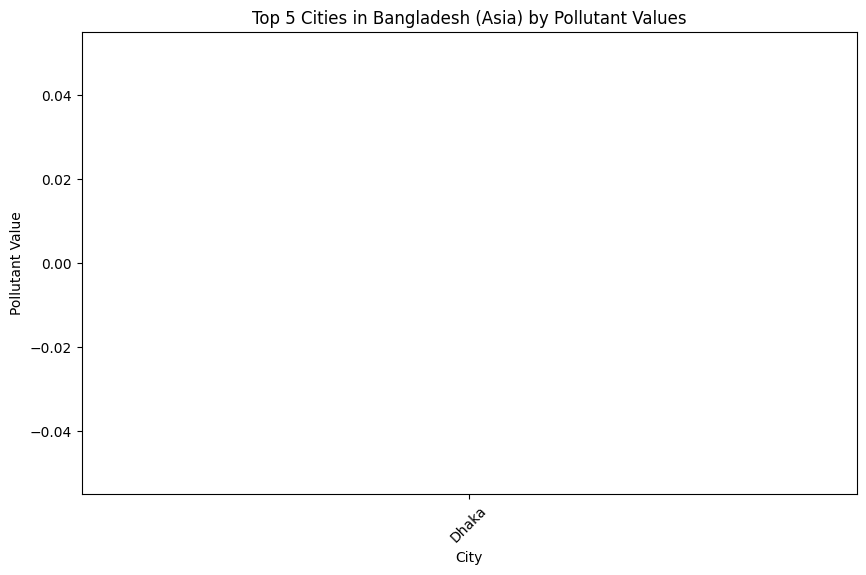

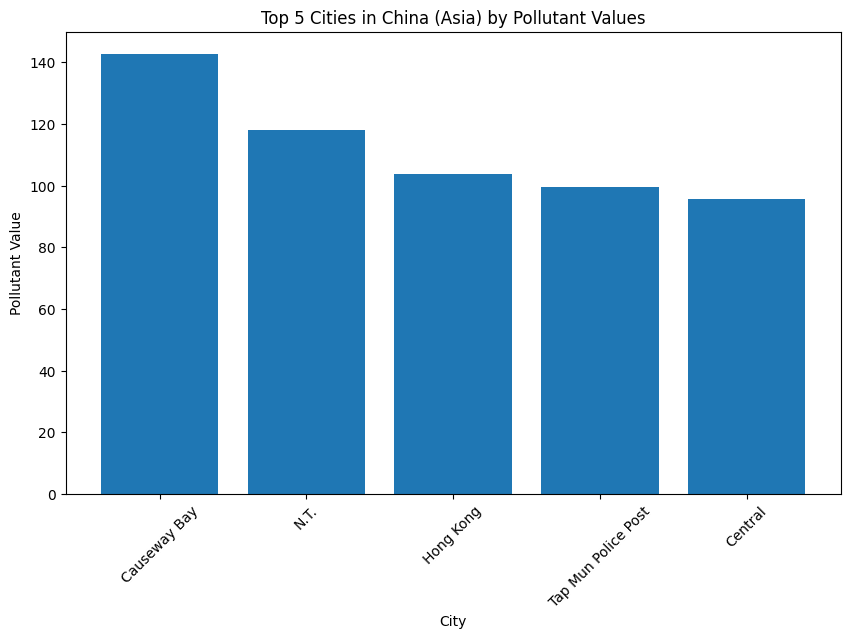

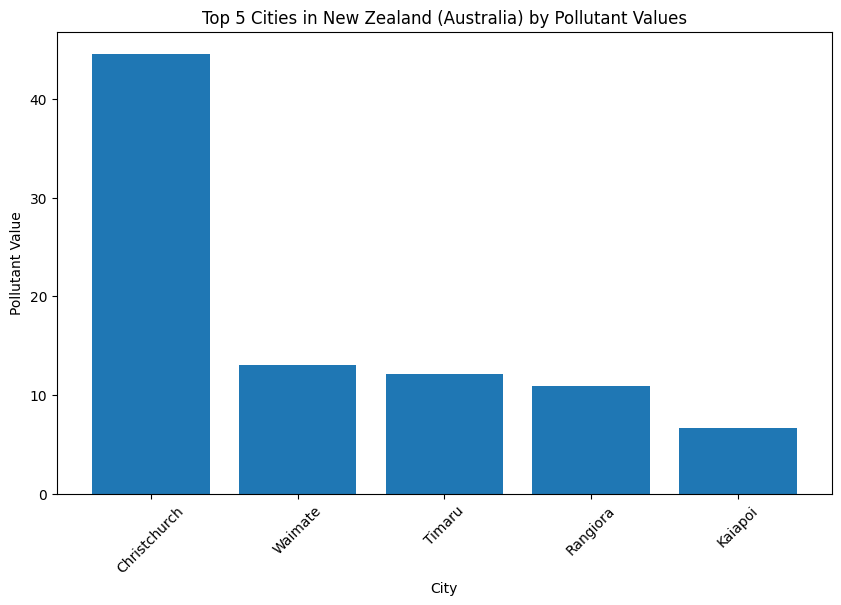

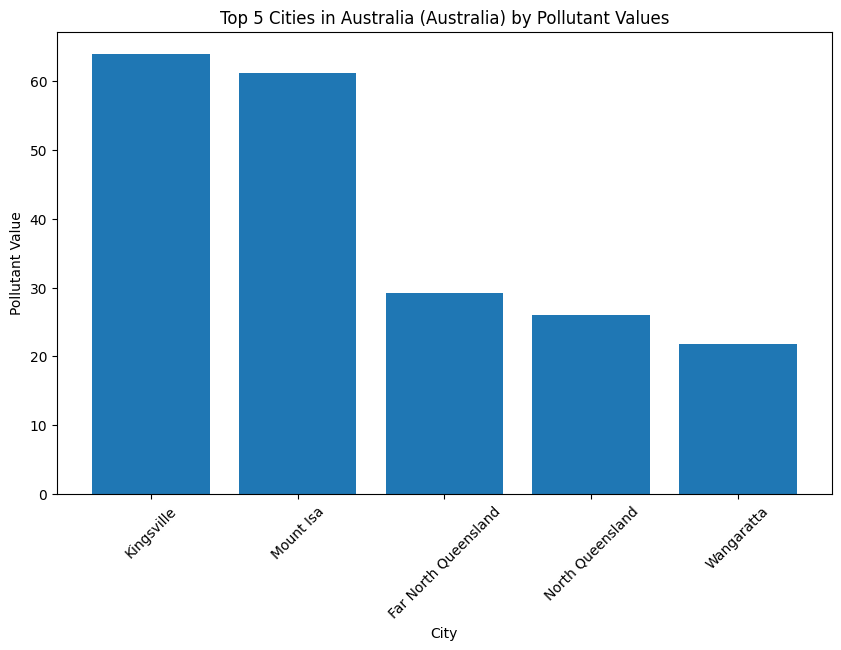

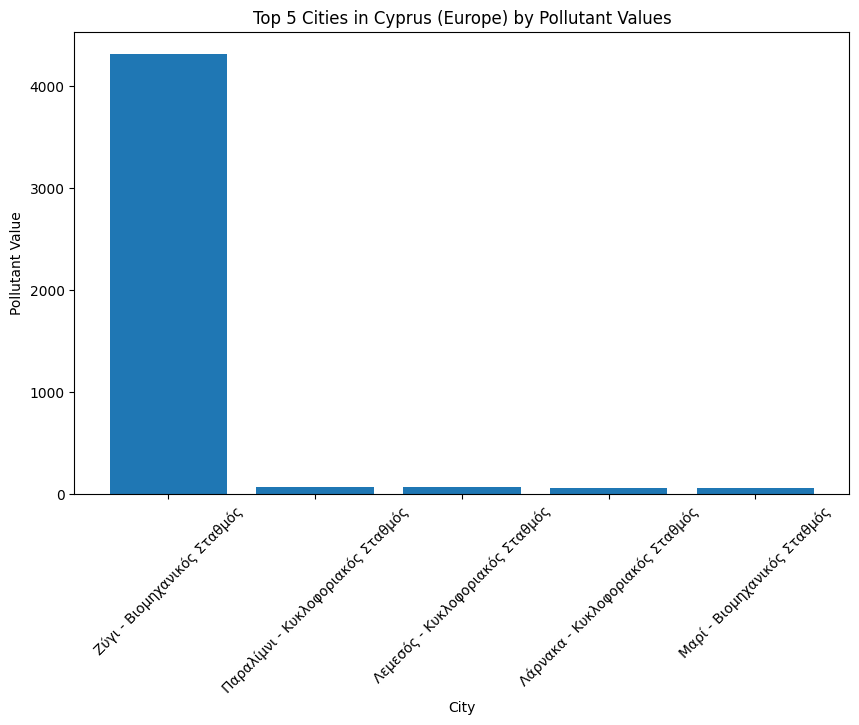

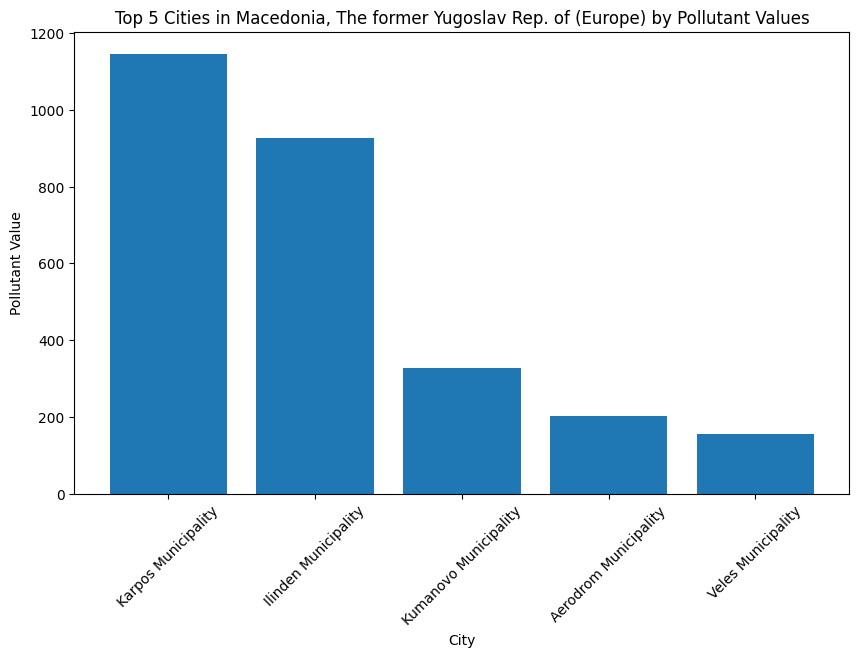

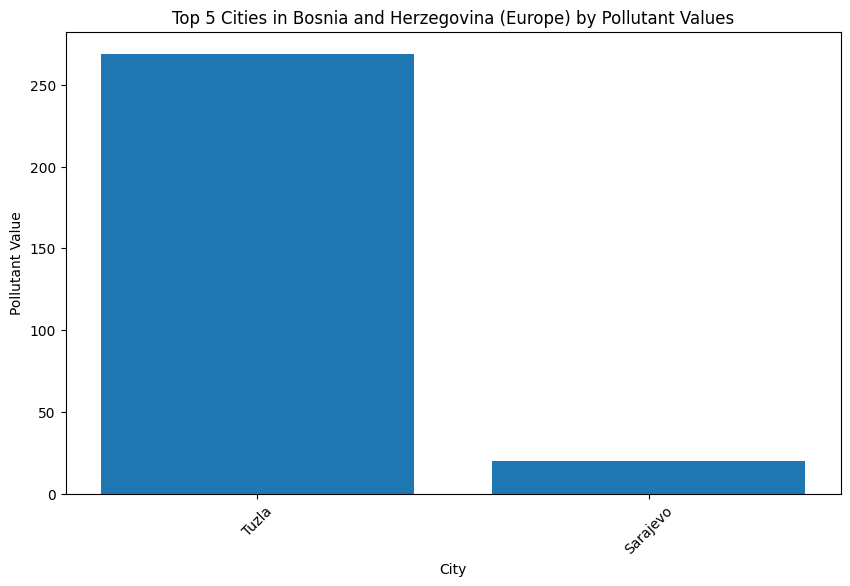

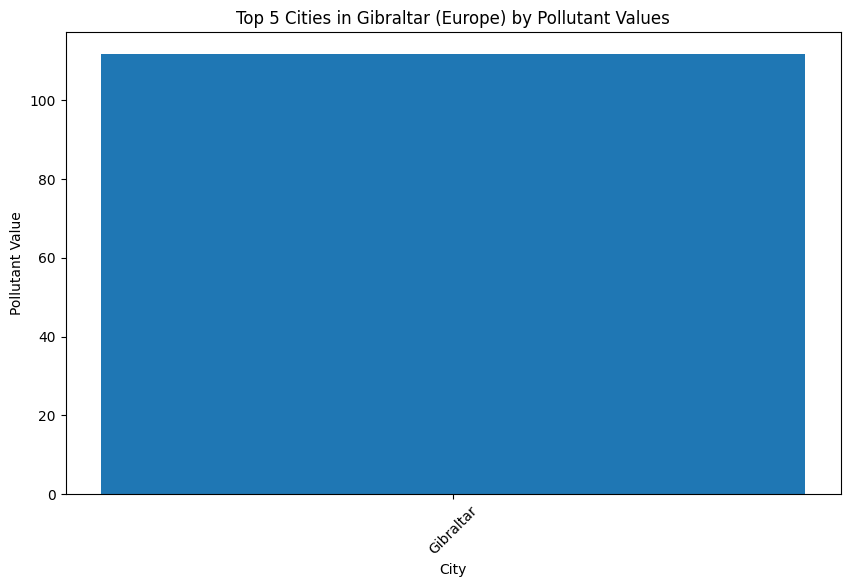

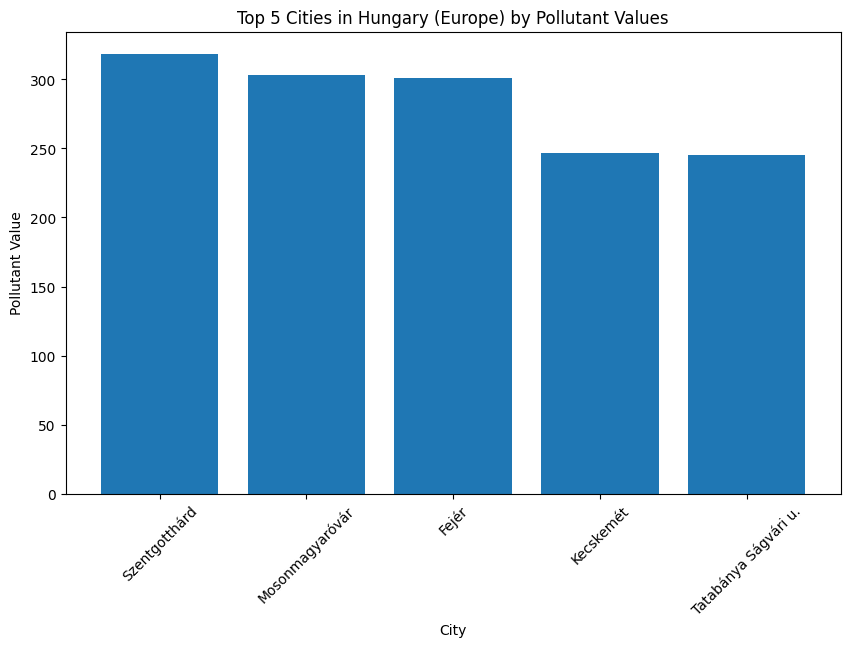

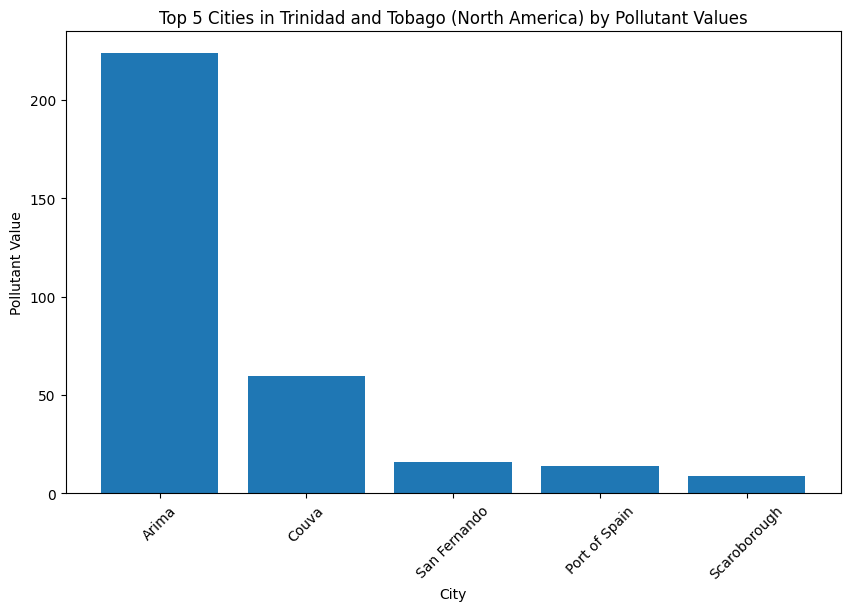

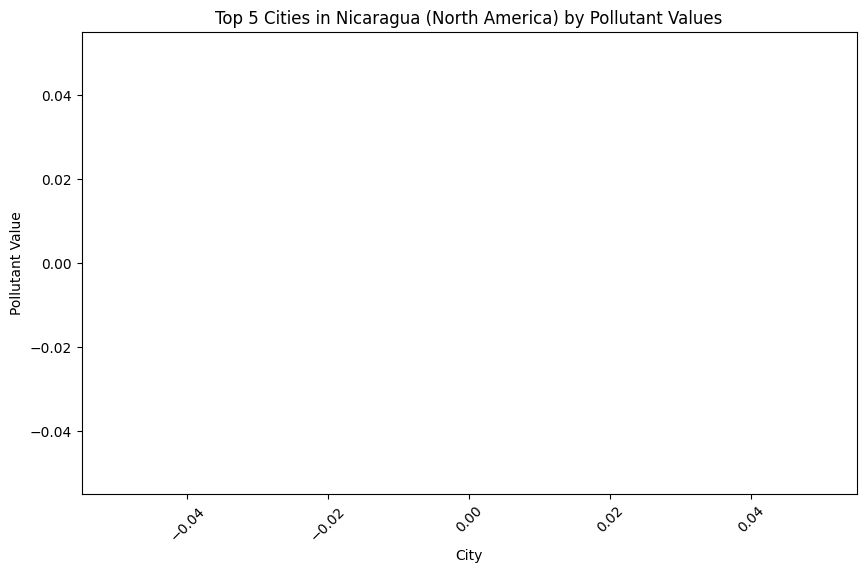

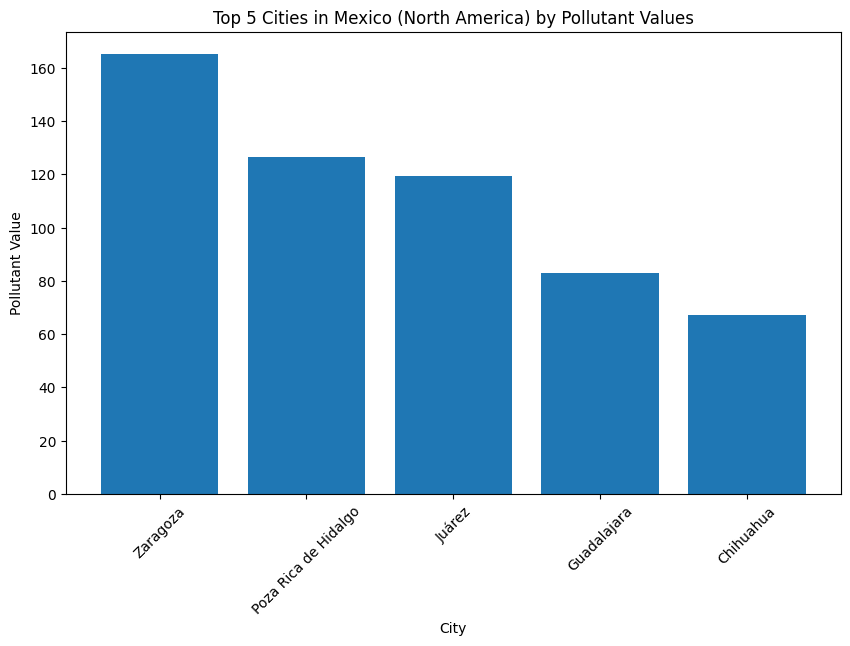

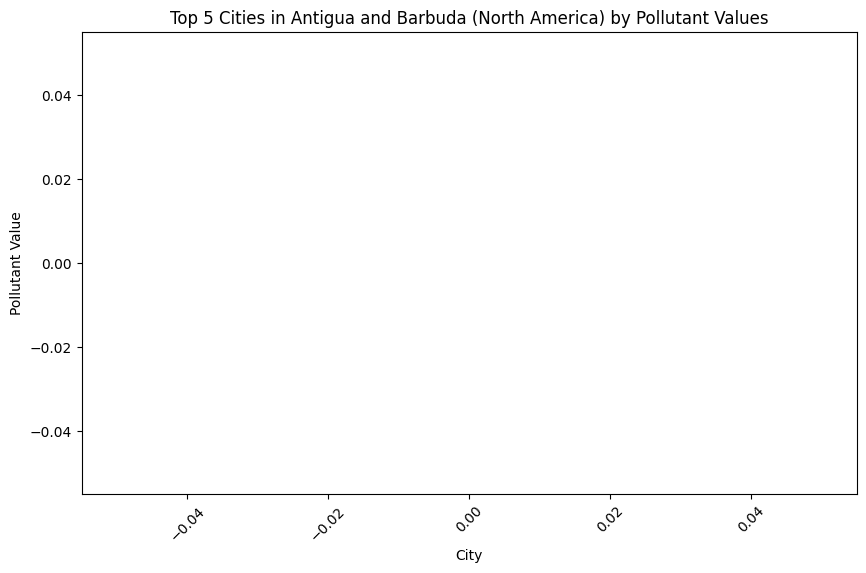

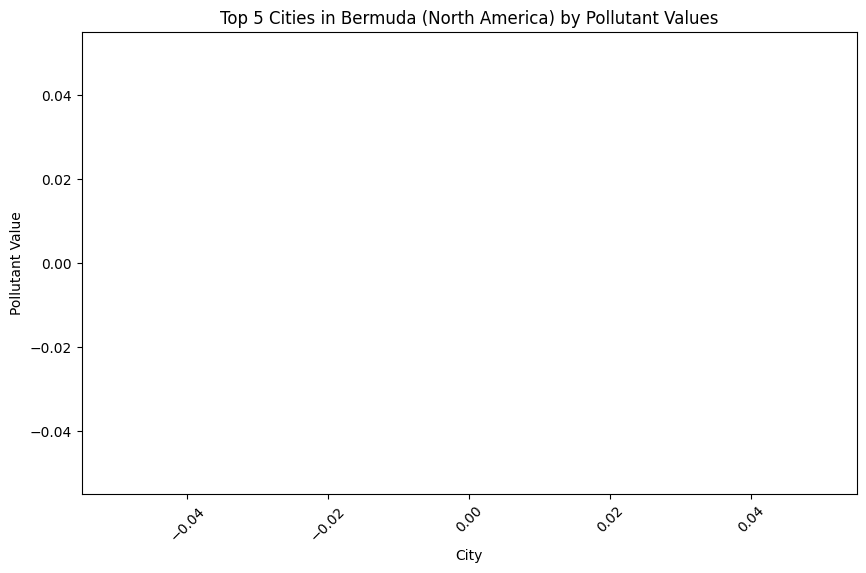

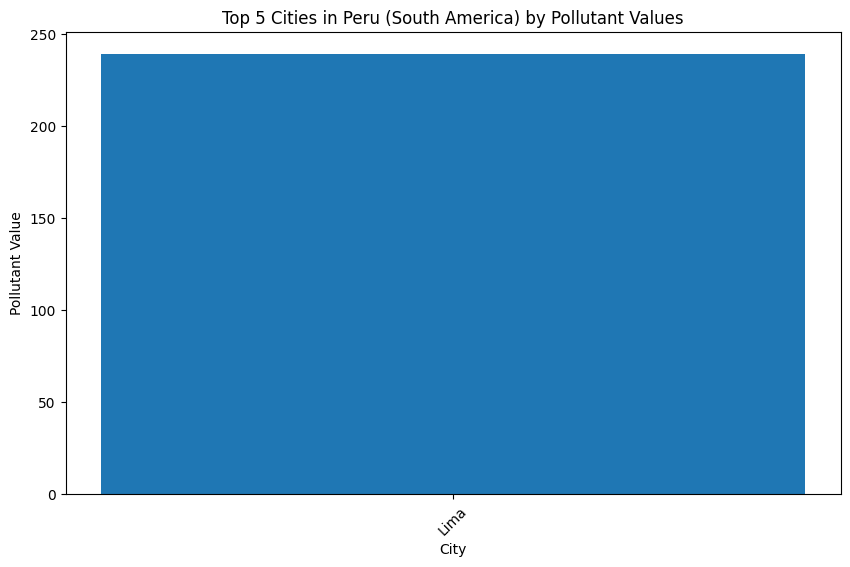

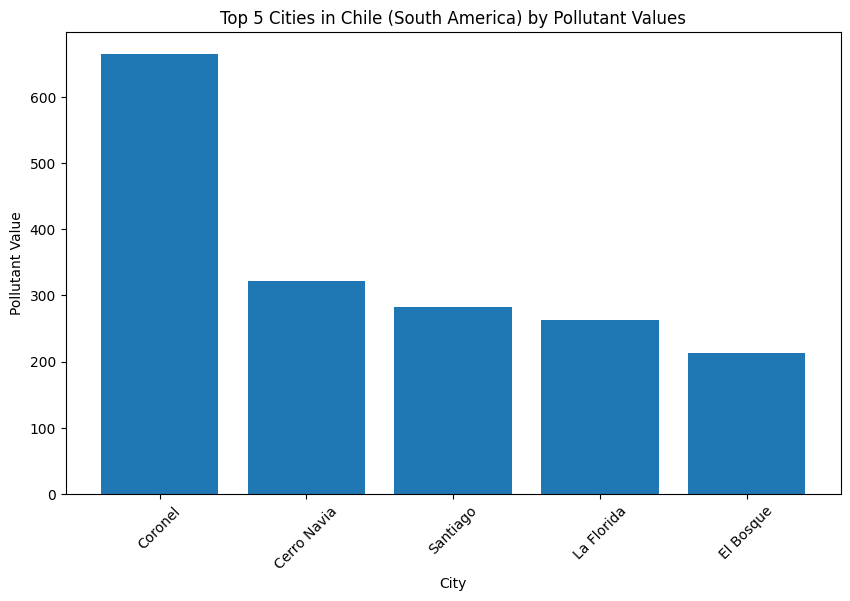

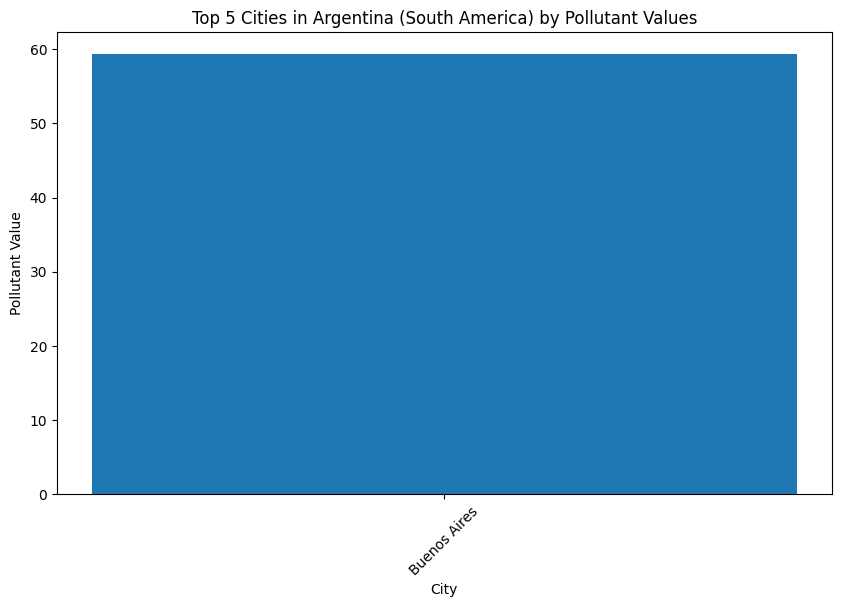

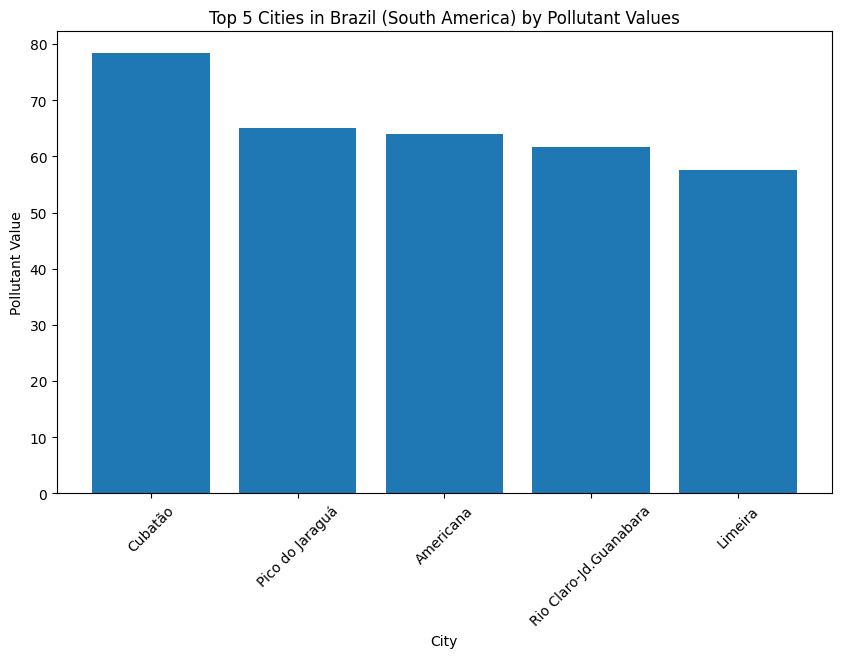

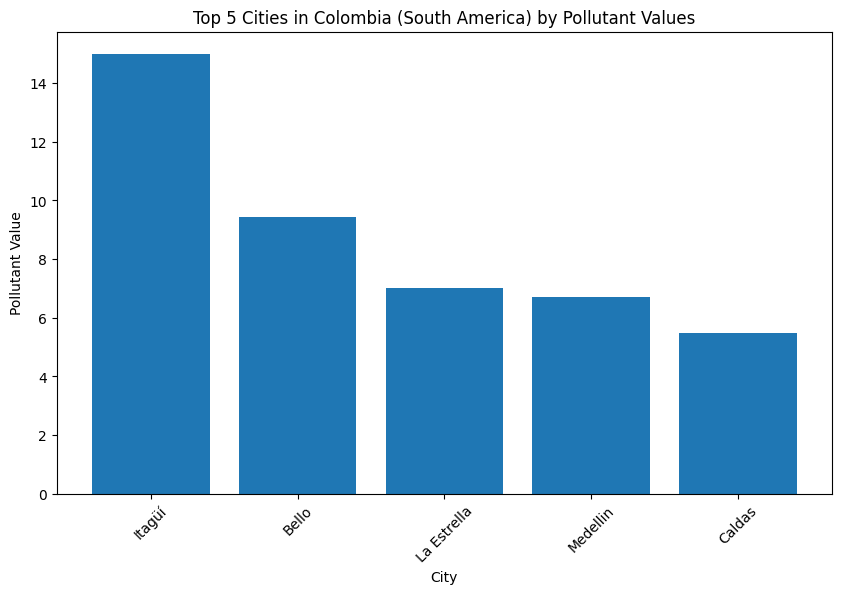

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a 'Region' column in your dataset based on your earlier discussion
# If not, you need to define the region for each country based on your data

# Group by region, country, and calculate the mean pollutant values
grouped_data = data.groupby(['Region', 'Country Label'])['Value'].mean().reset_index()

# Sort the data by pollutant values in descending order within each region
sorted_data = grouped_data.sort_values(by=['Region', 'Value'], ascending=[True, False])

# Initialize an empty list to store the results
top_countries_by_region = []

# Iterate through regions and select the top 5 countries
for region, region_data in sorted_data.groupby('Region'):
    top_countries = region_data['Country Label'].unique()[:5]
    top_countries_by_region.append({'Region': region, 'Top Countries': top_countries})

# Print the top 5 countries in each region with their pollutant values
for region_data in top_countries_by_region:
    print(f"Region: {region_data['Region']}")
    for country in region_data['Top Countries']:
        country_data = sorted_data[(sorted_data['Region'] == region_data['Region']) & (sorted_data['Country Label'] == country)]
        print(f"Country: {country}")
        print(country_data[['Country Label', 'Value']])

# Plot the top 5 countries in each region with their pollutant values
for region_data in top_countries_by_region:
    plt.figure(figsize=(10, 6))
    plt.title(f"Top 5 Countries in {region_data['Region']} by Pollutant Values")

    for country in region_data['Top Countries']:
        country_data = sorted_data[(sorted_data['Region'] == region_data['Region']) & (sorted_data['Country Label'] == country)]
        plt.bar(country_data['Country Label'], country_data['Value'], label=country)

    plt.xlabel('Country')
    plt.ylabel('Pollutant Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Iterate through regions and select the top 5 cities for each top country
for region_data in top_countries_by_region:
    for country in region_data['Top Countries']:
        country_data = data[(data['Region'] == region_data['Region']) & (data['Country Label'] == country)]
        top_cities = country_data.groupby('City')['Value'].mean().nlargest(5).index.tolist()
        print(f"Top 5 Cities in {country} ({region_data['Region']}): {top_cities}")

# Plot the top 5 cities in each top country
for region_data in top_countries_by_region:
    for country in region_data['Top Countries']:
        country_data = data[(data['Region'] == region_data['Region']) & (data['Country Label'] == country)]
        top_cities = country_data.groupby('City')['Value'].mean().nlargest(5)
        plt.figure(figsize=(10, 6))
        plt.title(f"Top 5 Cities in {country} ({region_data['Region']}) by Pollutant Values")
        plt.bar(top_cities.index, top_cities.values)
        plt.xlabel('City')
        plt.ylabel('Pollutant Value')
        plt.xticks(rotation=45)
        plt.show()


# 2.10 Checking Top 5 cities with the highest pollutant level

Top 5 Cities with the Highest Air Quality:
            City          Value
998    Kastamonu  178916.136111
241      Bilecik  123783.733750
1066  Kırklareli  106598.496867
802    Gümüşhane   72325.787333
623       Edirne   62003.463200


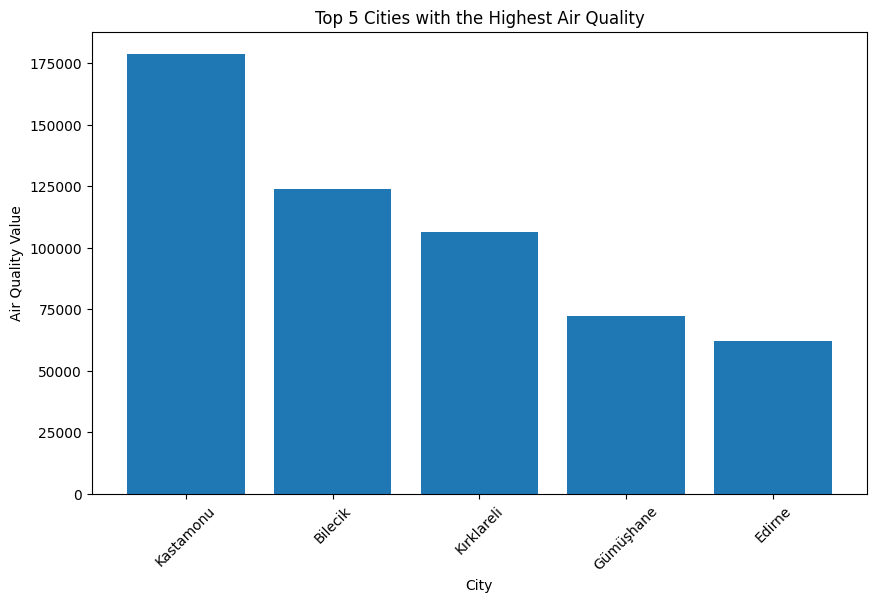

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by city and calculate the mean pollutant values
grouped_data = data.groupby('City')['Value'].mean().reset_index()

# Sort the data by pollutant values in descending order
sorted_data = grouped_data.sort_values(by='Value', ascending=False)

# Select the top 5 cities with the highest air quality values
top_cities = sorted_data.head(5)

# Print the top 5 cities with the highest air quality values
print("Top 5 Cities with the Highest Air Quality:")
print(top_cities)

# Plot the top 5 cities with the highest air quality values
plt.figure(figsize=(10, 6))
plt.bar(top_cities['City'], top_cities['Value'])
plt.title("Top 5 Cities with the Highest Air Quality")
plt.xlabel("City")
plt.ylabel("Air Quality Value")
plt.xticks(rotation=45)
plt.show()


# 2.11 Top 5 countries with highest pollutant levels

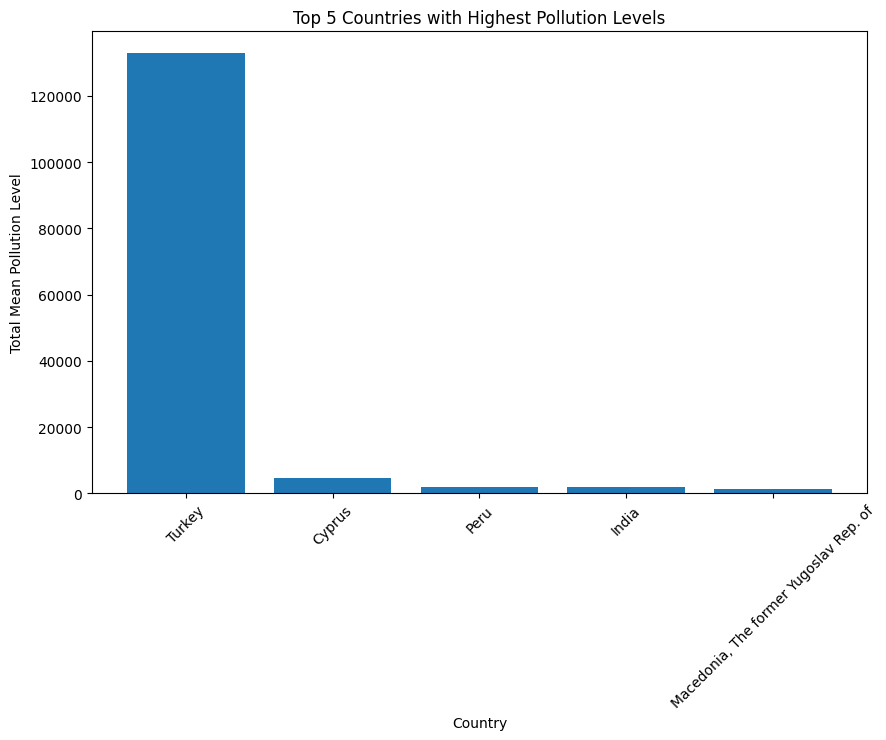

Top 5 countires with Highest Pollution Levels
Country Label
Turkey                                    132832.440599
Cyprus                                      4711.284092
Peru                                        1868.105675
India                                       1799.995658
Macedonia, The former Yugoslav Rep. of      1466.736678
dtype: float64


In [ ]:
# Define the 11 distinct pollutants
distinct_pollutants = ['PM10', 'PM2.5', 'O3', 'SO2', 'NO2', 'CO', 'NO', 'NOX', 'TEMPERATURE', 'BC', 'PM1']

# Group the data by 'Country Label' and 'Pollutant' and calculate the mean pollutant levels
country_pollutant_stats = data.groupby(['Country Label', 'Pollutant'])['Value'].mean().unstack()

# Calculate the total mean pollution level for each country by summing all pollutants
country_total_pollution = country_pollutant_stats.sum(axis=1)

# Find the top 5 countries with the highest total mean pollution levels
top_countries = country_total_pollution.nlargest(5)

# Visualize the top 5 countries with the highest total mean pollution levels
plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries.values)
plt.title('Top 5 Countries with Highest Pollution Levels')
plt.xlabel('Country')
plt.ylabel('Total Mean Pollution Level')
plt.xticks(rotation=45)
plt.show()

print('Top 5 countires with Highest Pollution Levels')
print(top_countries)

# Top 5 cities of Top 5 countries

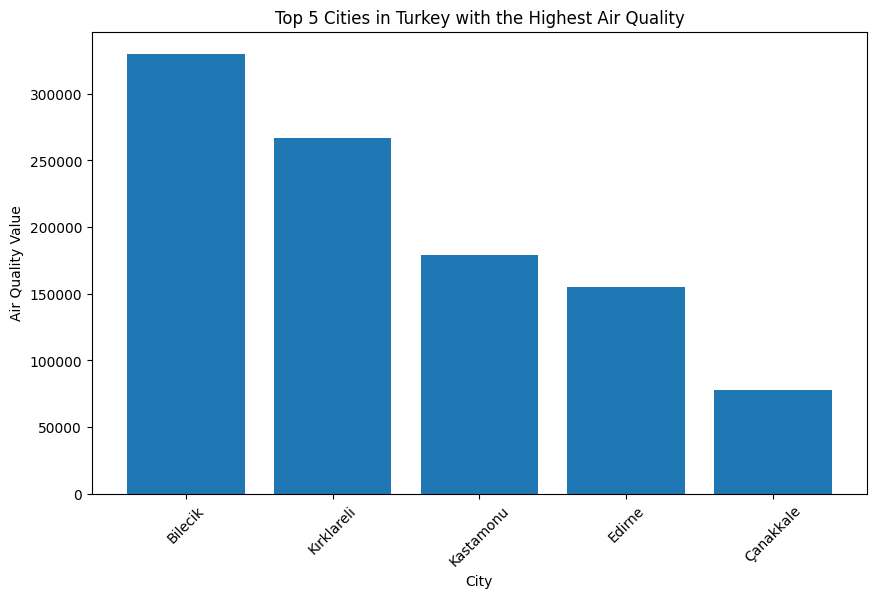

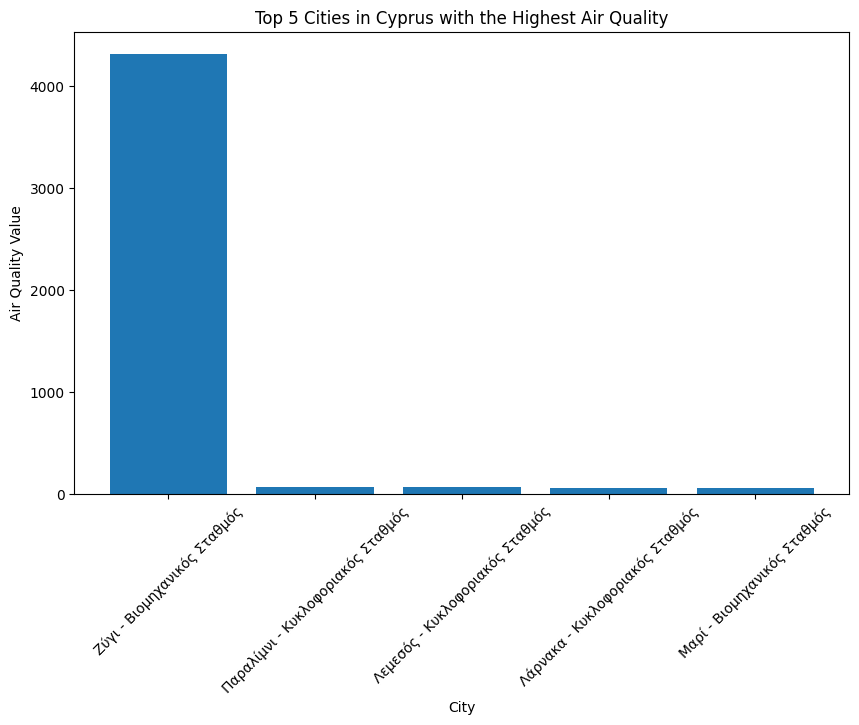

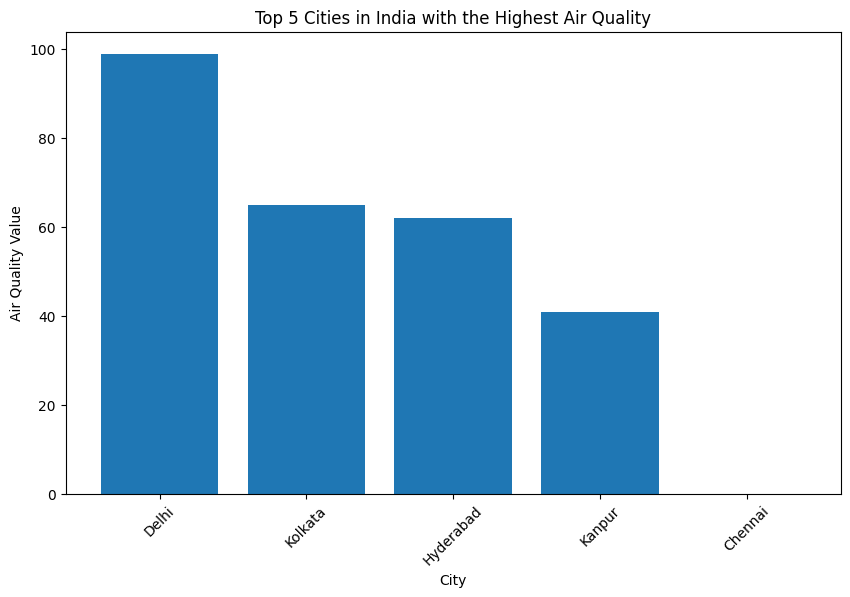

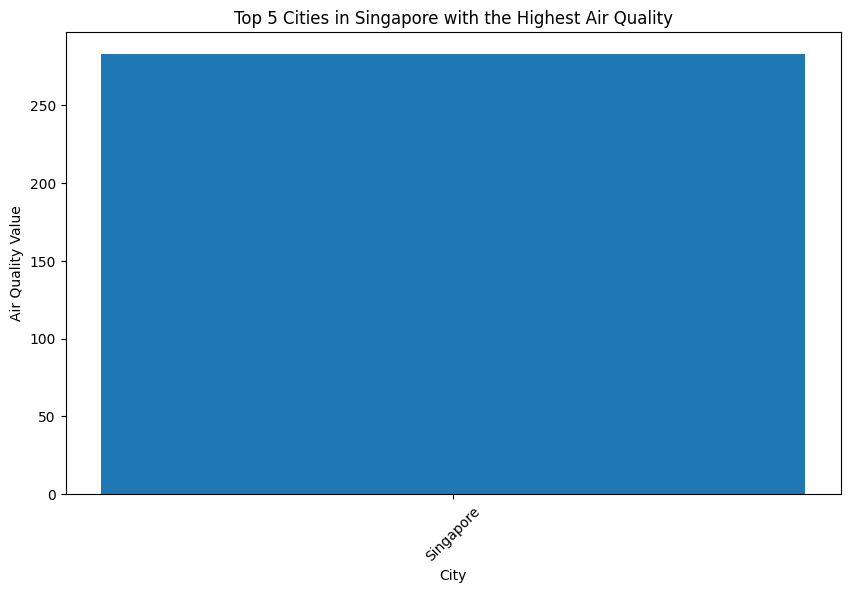

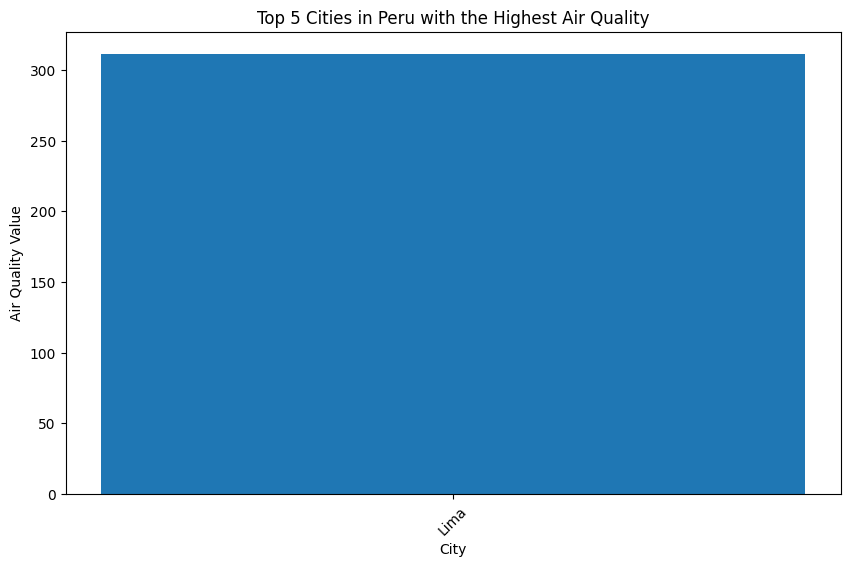

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is your DataFrame
# Define the top 5 countries
top_countries = data.groupby('Country Label')['Value'].mean().nlargest(5).index.tolist()

# Filter data for the top 5 countries
filtered_data = data[data['Country Label'].isin(top_countries)]

# Group by country, city, and pollutant, then calculate the mean pollutant values
grouped_data = filtered_data.groupby(['Country Label', 'City', 'Pollutant'])['Value'].mean().reset_index()

# Group the data by country and calculate the total mean pollutant level for each city
country_city_total_pollution = grouped_data.groupby(['Country Label', 'City'])['Value'].mean()

# Find the top 5 cities in each country with the highest total mean pollution levels
top_cities_by_country = {}
for country in top_countries:
    top_cities = country_city_total_pollution.loc[country].nlargest(5)
    top_cities_by_country[country] = top_cities

# Plot the top 5 cities in each country
for country, top_cities in top_cities_by_country.items():
    plt.figure(figsize=(10, 6))
    plt.bar(top_cities.index, top_cities.values)
    plt.title(f'Top 5 Cities in {country} with the Highest Air Quality')
    plt.xlabel('City')
    plt.ylabel('Air Quality Value')
    plt.xticks(rotation=45)
    plt.show()


# Top 5 countries in every region

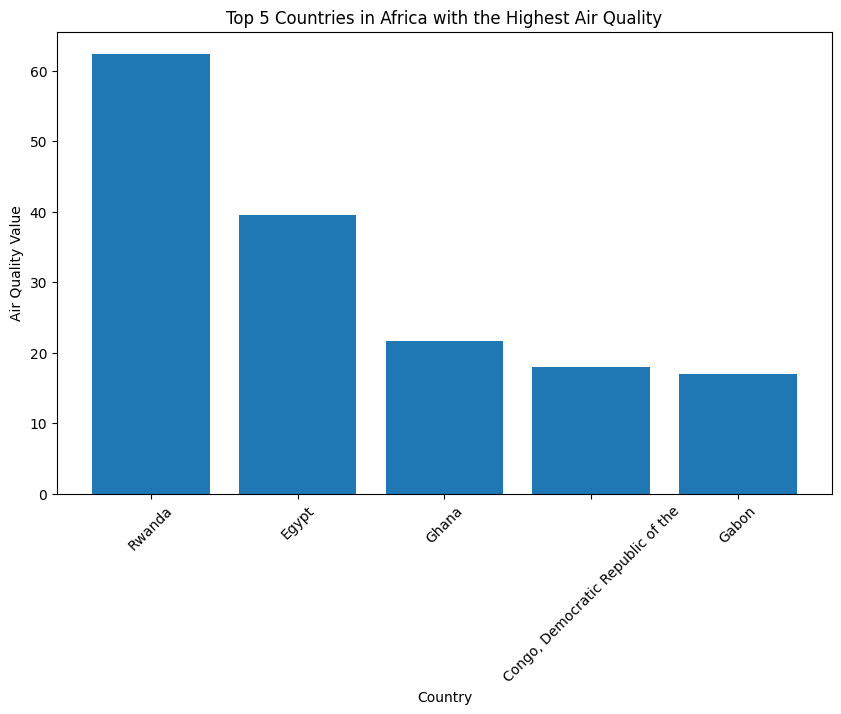

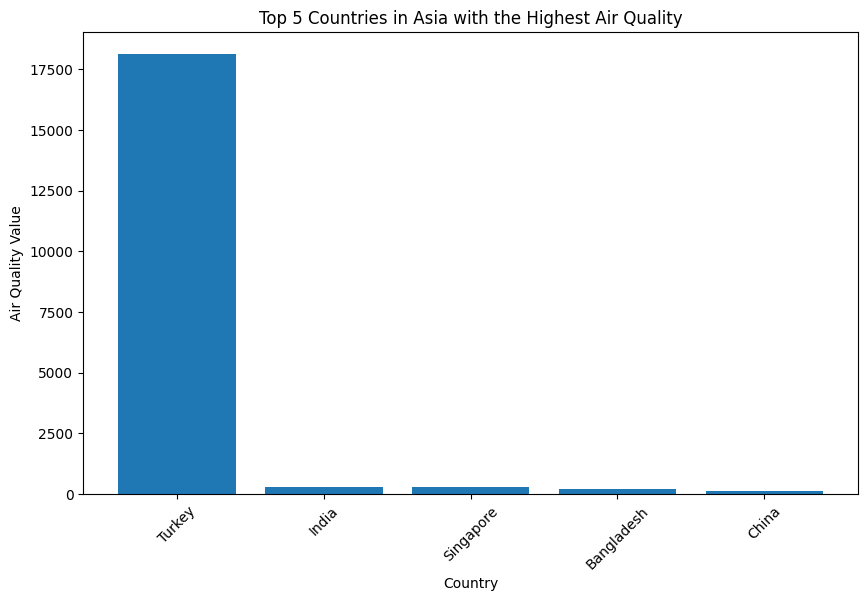

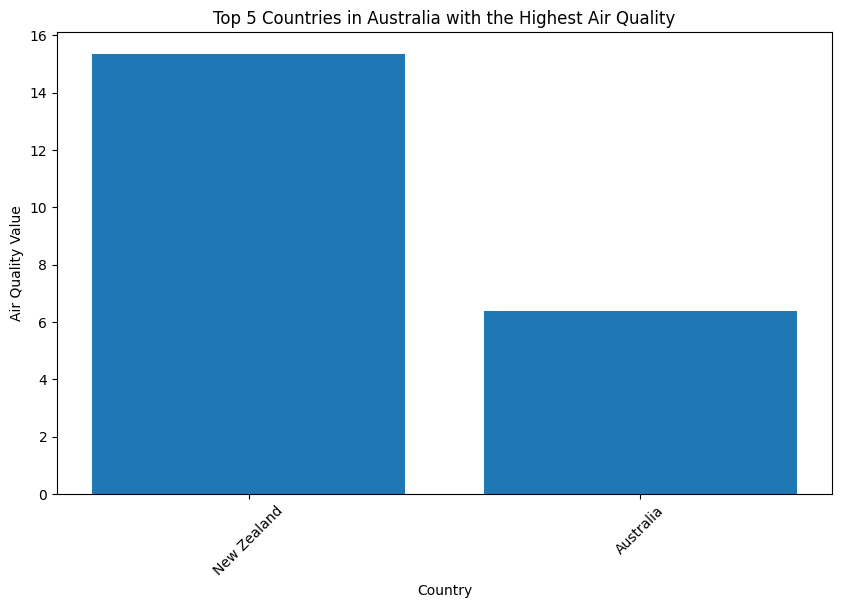

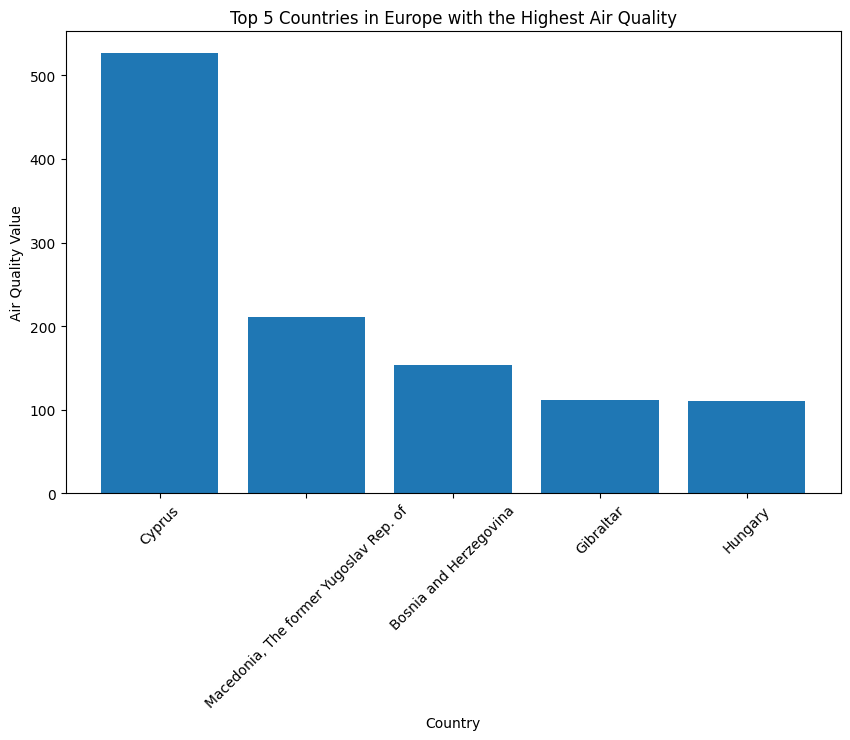

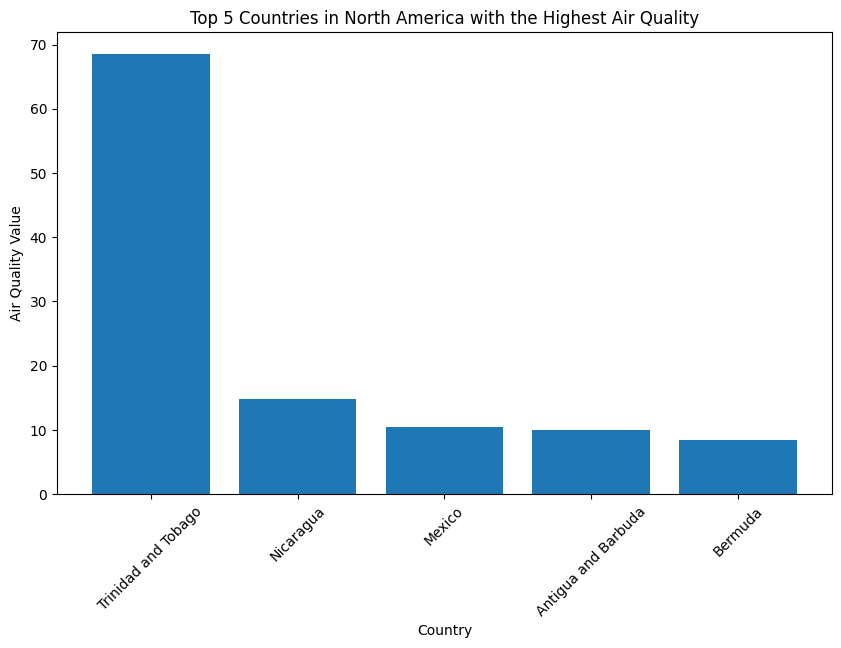

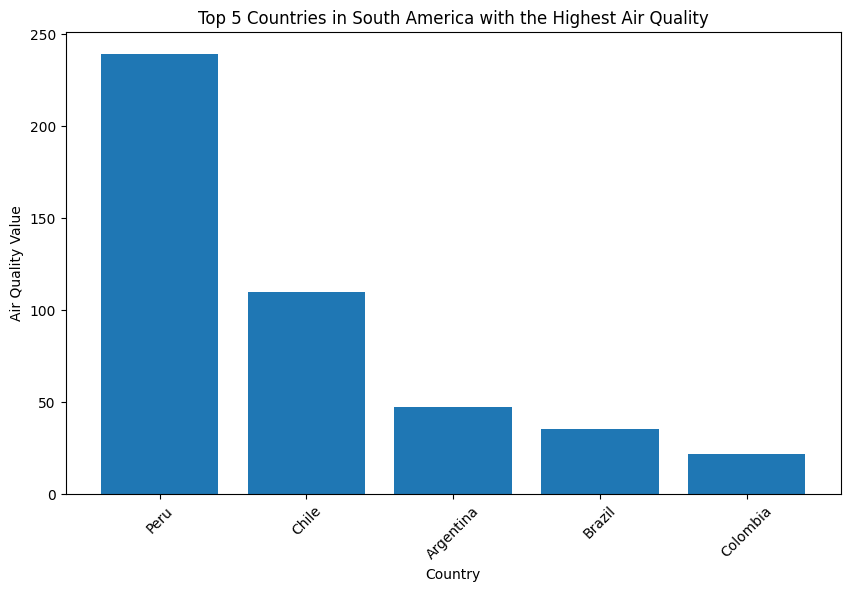

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is your DataFrame

# Group by region and country, then calculate the mean pollutant values
region_country_pollution = data.groupby(['Region', 'Country Label'])['Value'].mean().reset_index()

# Calculate the total mean pollution level for each country
country_total_pollution = region_country_pollution.groupby('Country Label')['Value'].mean()

# Find the top 5 countries in each region with the highest total mean pollution levels
top_countries_by_region = {}
for region in region_country_pollution['Region'].unique():
    region_data = region_country_pollution[region_country_pollution['Region'] == region]
    top_countries = region_data.groupby('Country Label')['Value'].mean().nlargest(5)
    top_countries_by_region[region] = top_countries

# Rank regions based on the overall pollution levels
region_ranks = country_total_pollution.groupby(data['Region']).mean().sort_values(ascending=False)

# Plot the top 5 countries in each region
for region, top_countries in top_countries_by_region.items():
    plt.figure(figsize=(10, 6))
    plt.bar(top_countries.index, top_countries.values)
    plt.title(f'Top 5 Countries in {region} with the Highest Air Quality')
    plt.xlabel('Country')
    plt.ylabel('Air Quality Value')
    plt.xticks(rotation=45)
    plt.show()




# 2.12 Outlier Detection
i decided to let go of the outliers as the data was sensitive

In [ ]:
import pandas as pd
import numpy as np

# Select the 'Value' column for outlier detection
values = data['Value']

# Calculate the Z-Scores for the 'Value' column
z_scores = (values - values.mean()) / values.std()

# Define a threshold for identifying outliers (e.g., Z-Score > 3 or < -3)
outlier_threshold = 3

# Create a boolean mask for identifying outliers
outliers = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)

# Filter the data to keep only the rows with outliers
outlier_data = data[outliers]

# Print the rows with outliers
print("Rows with Outliers:")
print(outlier_data)


Rows with Outliers:
      Country Code        City                                      Location  \
1527            TR  Kırklareli                                    Kırklareli   
2439            TR    Tekirdağ                   Tekirdağ - Çorlu OSB - MTHM   
4291            TR    İstanbul                           İstanbul - Kandilli   
4332            TR       Konya                               Konya - Akşehir   
6943            TR    İstanbul                   İstanbul - Mecidiyeköy-MTHM   
6957            TR       İzmir                                 İzmir - Çeşme   
8011            TR   Çanakkale                                            TR   
9684            TR    İstanbul                       İstanbul - Sultangazi 1   
9698            TR   Kastamonu                                            TR   
11175           TR   Gaziantep                          Gaziantep - Beydilli   
11182           TR     Karabük                             Karabük - 75. Yıl   
11188           TR  

# 2.13 Geographic Visualization

In [ ]:
#import folium
# Filter the dataset to exclude rows with missing location data
#data = data.dropna(subset=['Latitude', 'Longitude'])

# Create a base map with a starting location
#m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=5)

# Iterate through the filtered dataset and add markers for each data point
#for index, row in data.iterrows():
    # Customize the marker based on your data columns
    #popup_text = f"City: {row['City']}<br>Value: {row['Value']}"

    # Add a marker for each data point
    #folium.Marker(
        #location=[row['Latitude'], row['Longitude']],
        #popup=popup_text,
    #).add_to(m)

# Save the map as an HTML file or display it in a Jupyter Notebook
#m.save('air_quality_map.html')


# 2.14 Anomaly Detection

Rows with Anomalies:
      Country Code        City                                      Location  \
1527            TR  Kırklareli                                    Kırklareli   
2439            TR    Tekirdağ                   Tekirdağ - Çorlu OSB - MTHM   
4291            TR    İstanbul                           İstanbul - Kandilli   
4332            TR       Konya                               Konya - Akşehir   
6943            TR    İstanbul                   İstanbul - Mecidiyeköy-MTHM   
6957            TR       İzmir                                 İzmir - Çeşme   
8011            TR   Çanakkale                                            TR   
9684            TR    İstanbul                       İstanbul - Sultangazi 1   
9698            TR   Kastamonu                                            TR   
11175           TR   Gaziantep                          Gaziantep - Beydilli   
11182           TR     Karabük                             Karabük - 75. Yıl   
11188           TR 

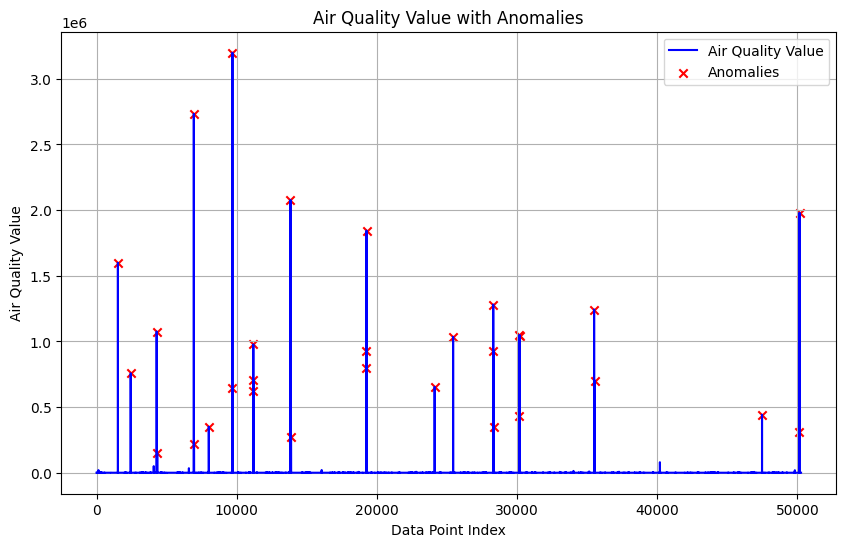

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the 'Value' column for anomaly detection
values = data['Value']

# Calculate the Z-Scores for the 'Value' column
z_scores = (values - values.mean()) / values.std()

# Define a threshold for identifying anomalies (e.g., Z-Score > 3 or < -3)
anomaly_threshold = 3

# Create a boolean mask for identifying anomalies
anomalies = (z_scores > anomaly_threshold) | (z_scores < -anomaly_threshold)

# Filter the data to keep only the rows with anomalies
anomaly_data = data[anomalies]

# Print the rows with anomalies
print("Rows with Anomalies:")
print(anomaly_data)

# Create a plot of the 'Value' column
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Value'], label='Air Quality Value', color='blue')
plt.title('Air Quality Value with Anomalies')
plt.xlabel('Data Point Index')
plt.ylabel('Air Quality Value')

# Overlay anomalies on the plot
anomaly_indices = data.index[anomalies]
anomaly_values = data['Value'][anomalies]
plt.scatter(anomaly_indices, anomaly_values, color='red', label='Anomalies', marker='x')

# Add a legend
plt.legend()

# Show or save the plot
plt.grid()
plt.show()


# 2.16 Cluster Analysis

C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


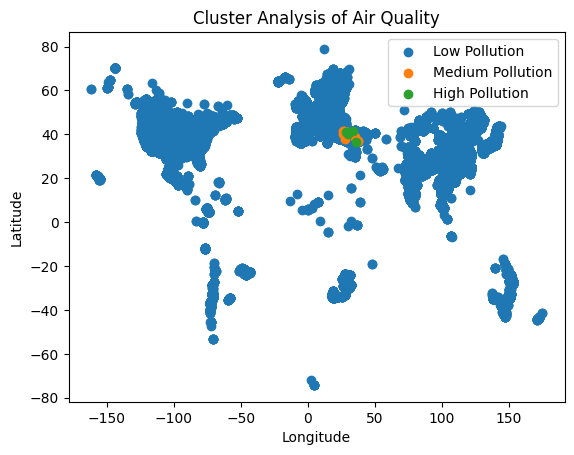

Cluster "Low Pollution":
  Number of Data Points: 50243
  Mean Air Quality Value: 118.44
  Interpretation: This cluster represents areas with air quality measurements around 118.44.

Cluster "Medium Pollution":
  Number of Data Points: 17
  Mean Air Quality Value: 944217.94
  Interpretation: This cluster represents areas with air quality measurements around 944217.94.

Cluster "High Pollution":
  Number of Data Points: 5
  Mean Air Quality Value: 2366605.00
  Interpretation: This cluster represents areas with air quality measurements around 2366605.00.



In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Select 'Value' column for clustering
X = data[['Value']]

# Define the number of clusters (you can choose the appropriate number)
n_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

# Create a mapping of numerical cluster labels to descriptive labels
cluster_mapping = {
    0: "Low Pollution",
    1: "Medium Pollution",
    2: "High Pollution"
}

# Apply the mapping to the 'Cluster' column
data['Cluster'] = data['Cluster'].map(cluster_mapping)

# Visualize the clusters with descriptive labels
for cluster_label in cluster_mapping.values():
    cluster_data = data[data['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=cluster_label)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Analysis of Air Quality')
plt.legend()
plt.show()

# Print cluster values with their meanings (now using descriptive labels)
for cluster_label in cluster_mapping.values():
    cluster_data = data[data['Cluster'] == cluster_label]
    cluster_mean = cluster_data['Value'].mean()
    print(f'Cluster "{cluster_label}":')
    print(f'  Number of Data Points: {len(cluster_data)}')
    print(f'  Mean Air Quality Value: {cluster_mean:.2f}')
    print(f'  Interpretation: This cluster represents areas with air quality measurements around {cluster_mean:.2f}.')
    print()


In [ ]:
print(data.columns)


Index(['Country Code', 'City', 'Location', 'Coordinates', 'Pollutant',
       'Source Name', 'Unit', 'Value', 'Last Updated', 'Country Label',
       'Latitude', 'Longitude', 'PM10_SubIndex', 'PM2.5_SubIndex',
       'O3_SubIndex', 'SO2_SubIndex', 'NO2_SubIndex', 'CO_SubIndex',
       'NO_SubIndex', 'NOX_SubIndex', 'TEMPERATURE_SubIndex', 'BC_SubIndex',
       'PM1_SubIndex', 'AQI', 'Region', 'Cluster'],
      dtype='object')


# 2.17 Correlation Matrix

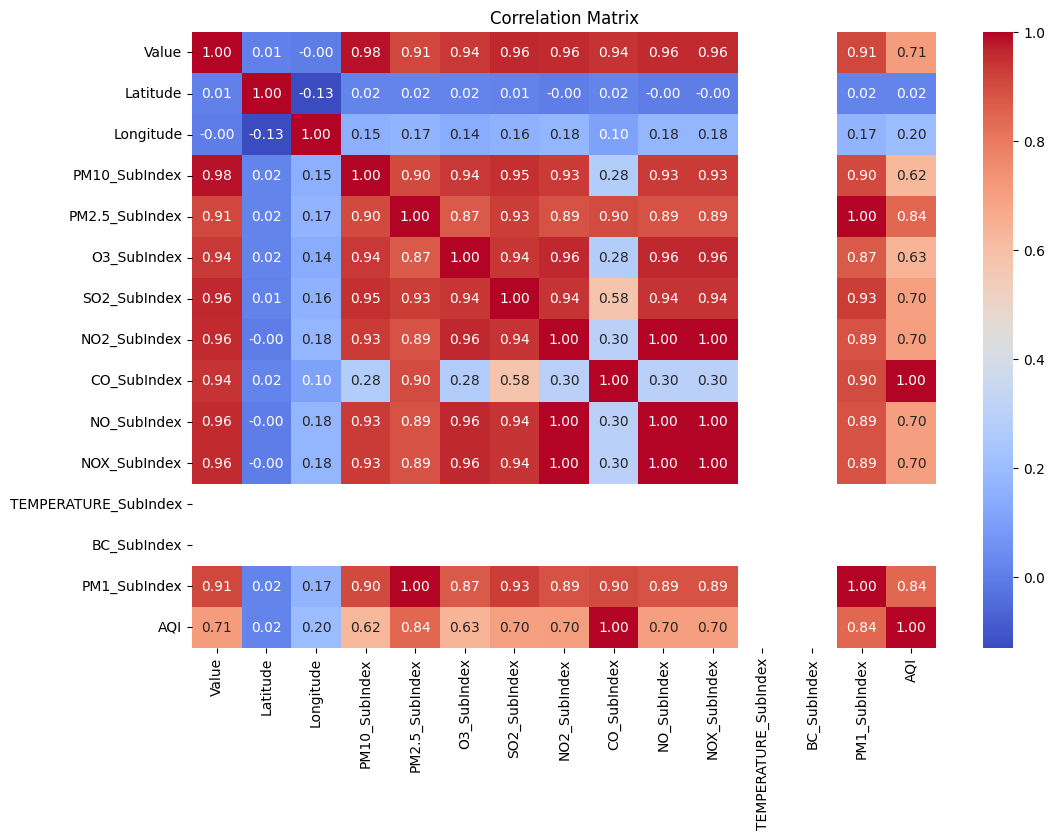

Correlation Matrix:
                         Value  Latitude  Longitude  PM10_SubIndex  \
Value                 1.000000  0.007391  -0.001166       0.982601   
Latitude              0.007391  1.000000  -0.130791       0.015468   
Longitude            -0.001166 -0.130791   1.000000       0.151599   
PM10_SubIndex         0.982601  0.015468   0.151599       1.000000   
PM2.5_SubIndex        0.911574  0.018542   0.166320       0.904704   
O3_SubIndex           0.936441  0.018286   0.142835       0.936663   
SO2_SubIndex          0.960395  0.012283   0.161914       0.949689   
NO2_SubIndex          0.958750 -0.001289   0.177887       0.931478   
CO_SubIndex           0.943975  0.017492   0.104631       0.278201   
NO_SubIndex           0.958750 -0.001289   0.177887       0.931478   
NOX_SubIndex          0.958750 -0.001289   0.177887       0.931478   
TEMPERATURE_SubIndex       NaN       NaN        NaN            NaN   
BC_SubIndex                NaN       NaN        NaN            NaN   


In [ ]:
# Select only the numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Select only the numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



# 2.18 One hot encoding for pollutant column

In [ ]:
# Use the get_dummies function to one-hot encode the 'Pollutant' column
data = pd.get_dummies(data, columns=['Pollutant'], prefix='Pollutant', drop_first=True)


In [ ]:
# Print the column names
print(data.columns)


Index(['Country Code', 'City', 'Location', 'Coordinates', 'Source Name',
       'Unit', 'Value', 'Last Updated', 'Country Label', 'Latitude',
       'Longitude', 'PM10_SubIndex', 'PM2.5_SubIndex', 'O3_SubIndex',
       'SO2_SubIndex', 'NO2_SubIndex', 'CO_SubIndex', 'NO_SubIndex',
       'NOX_SubIndex', 'TEMPERATURE_SubIndex', 'BC_SubIndex', 'PM1_SubIndex',
       'AQI', 'Region', 'Cluster', 'Pollutant_CO', 'Pollutant_NO',
       'Pollutant_NO2', 'Pollutant_NOX', 'Pollutant_O3', 'Pollutant_PM1',
       'Pollutant_PM10', 'Pollutant_PM2.5', 'Pollutant_SO2',
       'Pollutant_TEMPERATURE'],
      dtype='object')


# Predictive Modelling

# Models

**Mean Squared Error (MSE):** 441.2292

**R-squared (R2) Score:** 0.9725

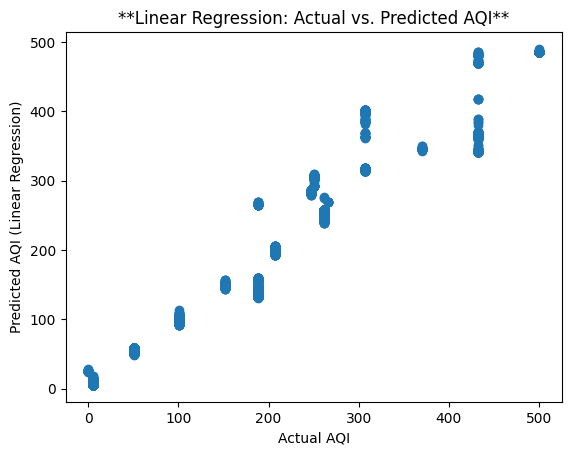

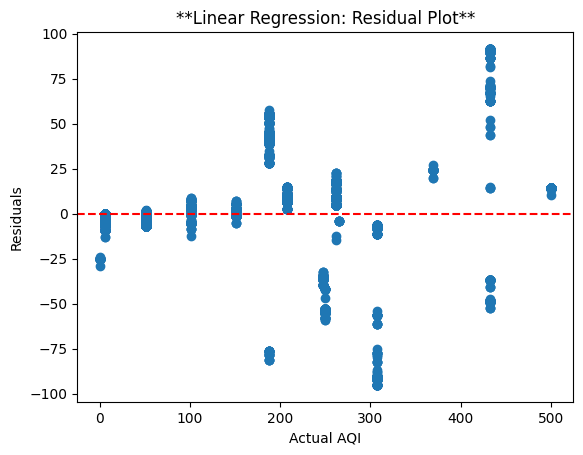

Mean Squared Error (MSE): 0.0000
R-squared (R2) Score: 1.0000


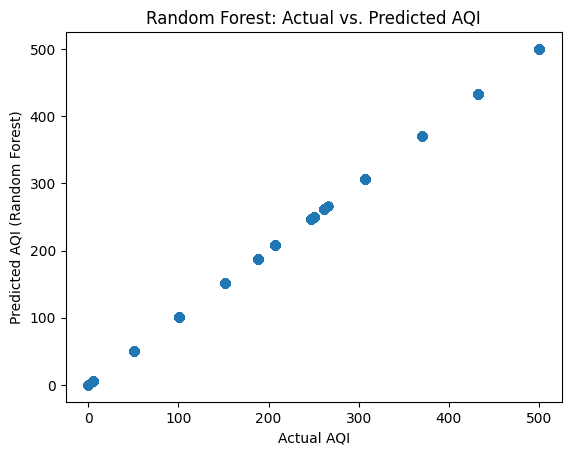

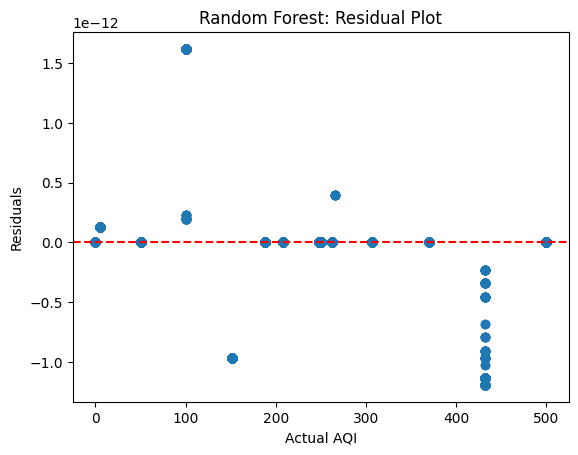

Mean Squared Error (MSE): 3.2073
R-squared (R2) Score: 0.9998


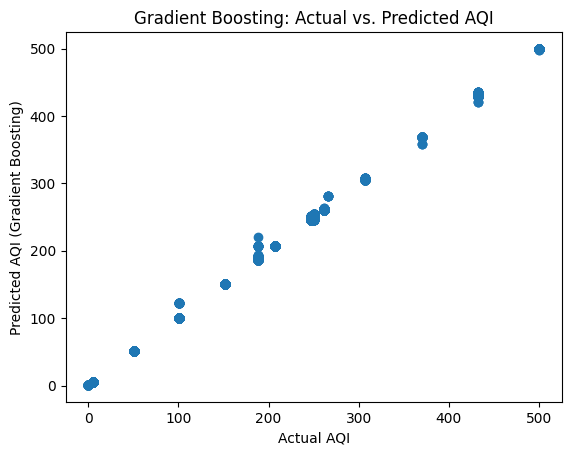

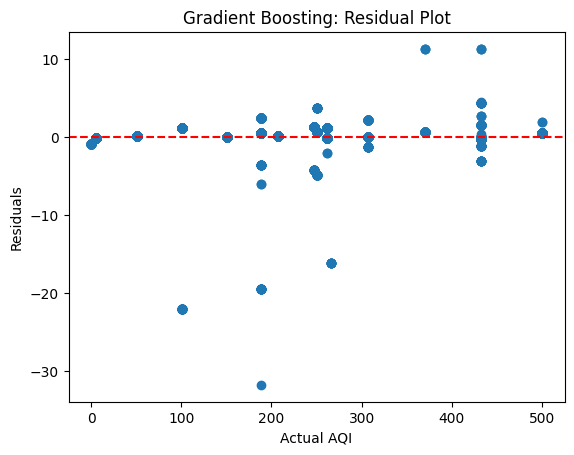

Mean Squared Error (MSE): 93.7738
R-squared (R2) Score: 0.9941


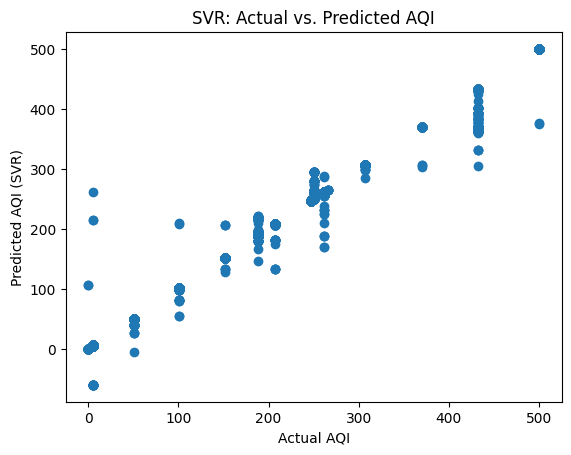

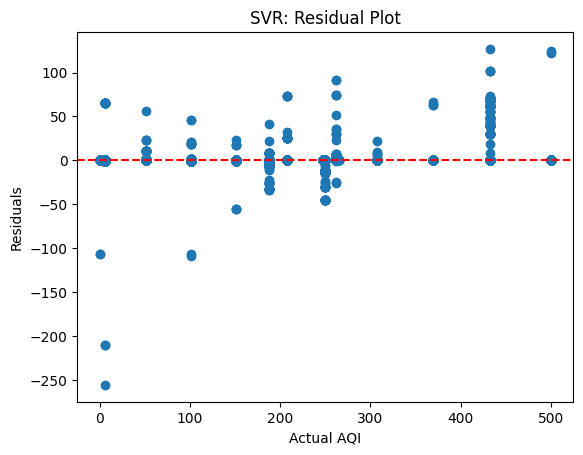

Mean Squared Error (MSE): 11.7838
R-squared (R2) Score: 0.9993


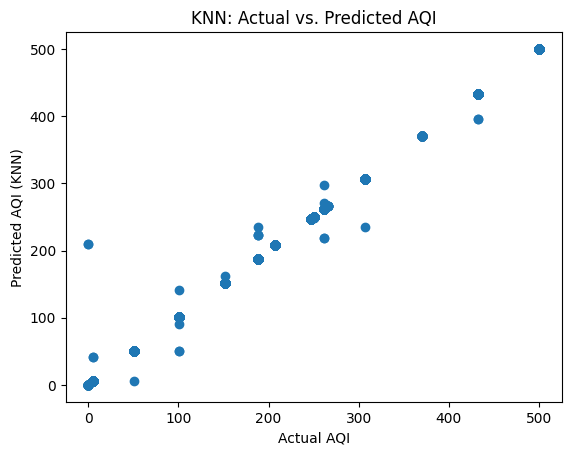

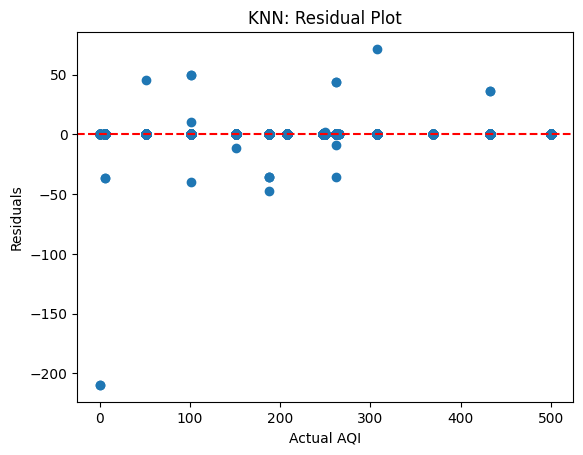

Epoch 1/100
1257/1257 [==============================] - 3s 2ms/step - loss: 2347.6470 - val_loss: 139.4700
Epoch 2/100
1257/1257 [==============================] - 2s 2ms/step - loss: 71.4738 - val_loss: 22.4091
Epoch 3/100
1257/1257 [==============================] - 2s 2ms/step - loss: 10.7360 - val_loss: 7.2221
Epoch 4/100
1257/1257 [==============================] - 2s 2ms/step - loss: 4.5859 - val_loss: 2.2814
Epoch 5/100
1257/1257 [==============================] - 2s 2ms/step - loss: 1.7434 - val_loss: 2.2532
Epoch 6/100
1257/1257 [==============================] - 2s 2ms/step - loss: 1.4606 - val_loss: 0.8197
Epoch 7/100
1257/1257 [==============================] - 2s 2ms/step - loss: 1.6148 - val_loss: 1.4641
Epoch 8/100
1257/1257 [==============================] - 2s 2ms/step - loss: 1.2946 - val_loss: 0.5952
Epoch 9/100
1257/1257 [==============================] - 2s 2ms/step - loss: 1.3401 - val_loss: 0.6579
Epoch 10/100
1257/1257 [==============================] - 2s 2ms/

Mean Squared Error (MSE): 0.1374
315/315 [==============================] - 0s 1ms/step
R-squared (R2) Score: 1.0000


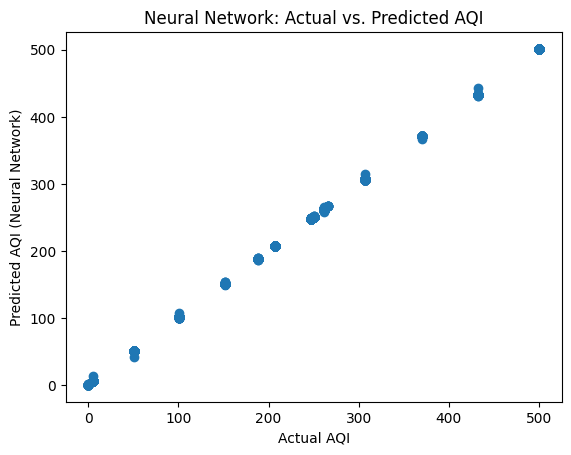

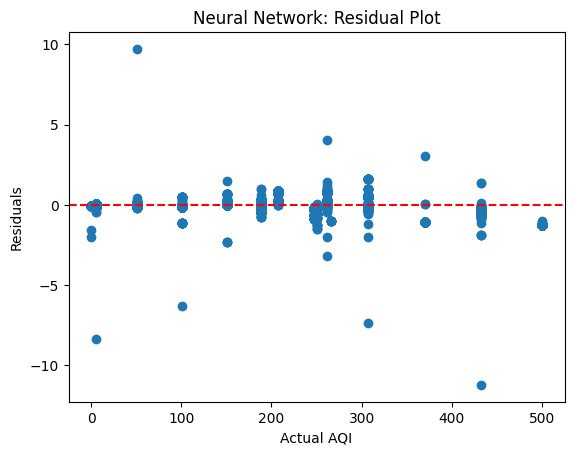

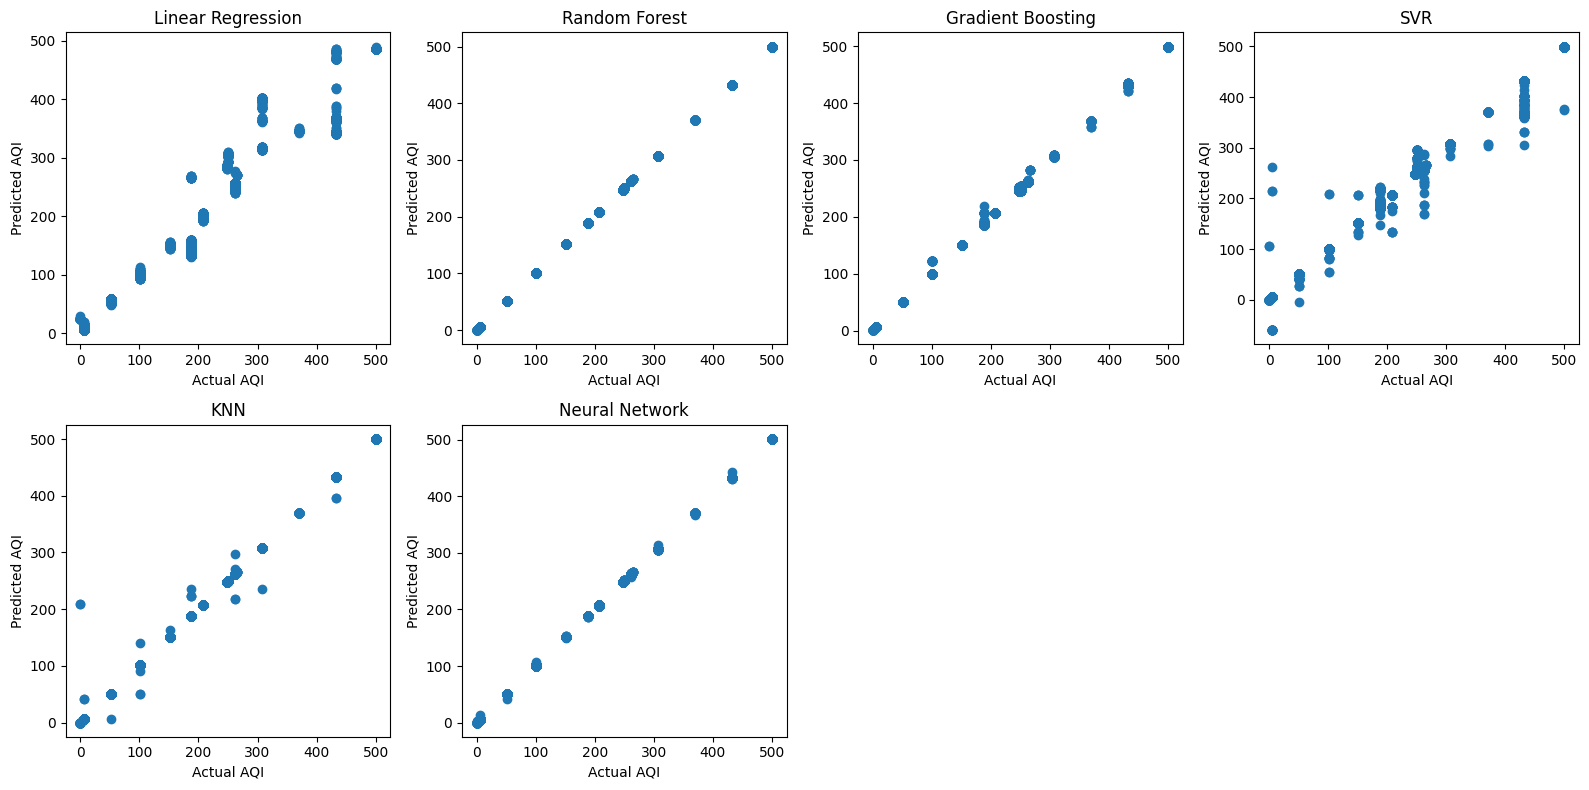

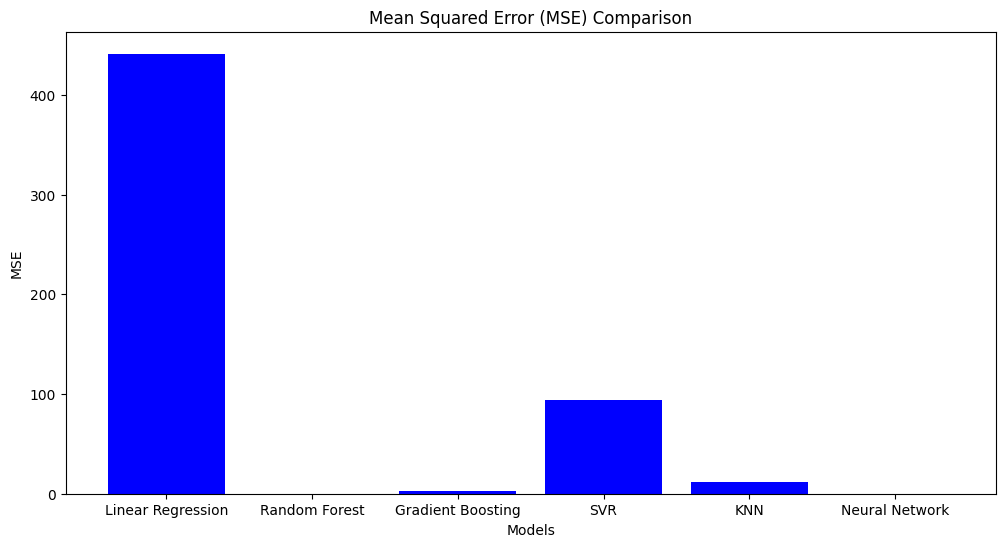

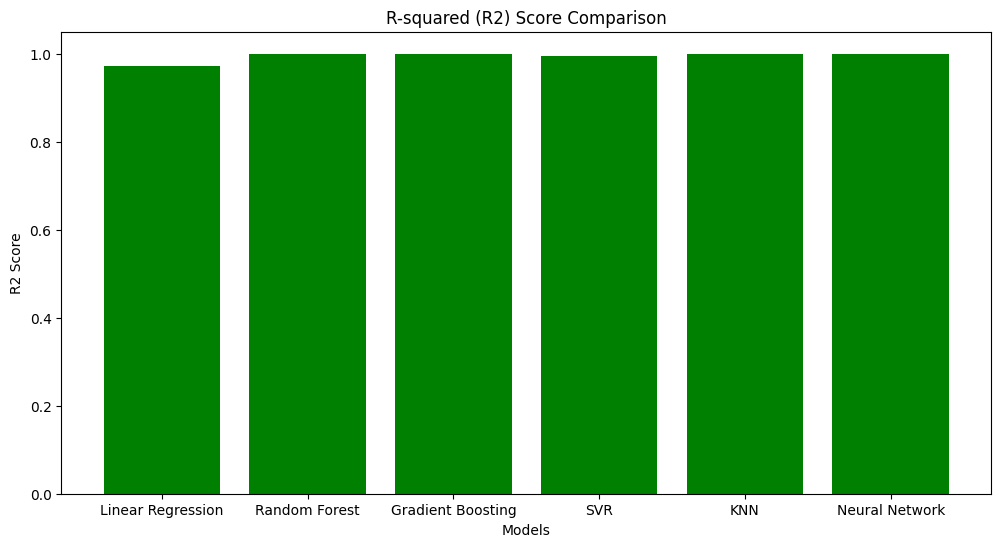

In [ ]:
# Fill null values with zero for the entire DataFrame
data = data.fillna(0)

# Replace negative values with zero for both target variable and features
data['AQI'] = data['AQI'].apply(lambda x: max(0, x))

selected_features = ['PM10_SubIndex', 'PM2.5_SubIndex', 'O3_SubIndex',
       'SO2_SubIndex', 'NO2_SubIndex', 'CO_SubIndex', 'NO_SubIndex',
       'NOX_SubIndex', 'TEMPERATURE_SubIndex', 'BC_SubIndex', 'PM1_SubIndex','Pollutant_CO', 'Pollutant_NO',
       'Pollutant_NO2', 'Pollutant_NOX', 'Pollutant_O3', 'Pollutant_PM1',
       'Pollutant_PM10', 'Pollutant_PM2.5', 'Pollutant_SO2',
       'Pollutant_TEMPERATURE']

data[selected_features] = data[selected_features].applymap(lambda x: max(0, x))

# Select features and target variable
X = data[selected_features]
y = data['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Regression:

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print results using HTML for bold text and increased size
display(HTML('<h2 style="font-weight:bold; font-size:20px;">Linear Regression Results:</h2>'))
display(Markdown(f'**Mean Squared Error (MSE):** {mse_linear:.4f}'))
display(Markdown(f'**R-squared (R2) Score:** {r2_linear:.4f}'))

# Plot scatter plot with bold heading
plt.figure()
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI (Linear Regression)')
plt.title('**Linear Regression: Actual vs. Predicted AQI**')
plt.show()

# Calculate residuals
residuals_linear = y_test - y_pred_linear

# Plot residual plot with bold heading
plt.figure()
plt.scatter(y_test, residuals_linear)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('**Linear Regression: Residual Plot**')
plt.xlabel('Actual AQI')
plt.ylabel('Residuals')
plt.show()


# 2. Random Forest:

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
display(HTML('<h2 style="font-weight:bold; font-size:20px;">Random Forest Results:</h2>'))
print(f'Mean Squared Error (MSE): {mse_rf:.4f}')
print(f'R-squared (R2) Score: {r2_rf:.4f}')

# Plot scatter plot
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI (Random Forest)')
plt.title('Random Forest: Actual vs. Predicted AQI')
plt.show()

# Calculate residuals
residuals_rf = y_test - y_pred_rf

# Plot residual plot
plt.figure()
plt.scatter(y_test, residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Random Forest: Residual Plot')
plt.xlabel('Actual AQI')
plt.ylabel('Residuals')
plt.show()

# 3. Gradient Boosting:

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print results
display(HTML('<h2 style="font-weight:bold; font-size:20px;">Gradient Boosting Results:</h2>'))
print(f'Mean Squared Error (MSE): {mse_gb:.4f}')
print(f'R-squared (R2) Score: {r2_gb:.4f}')

# Plot scatter plot
plt.figure()
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI (Gradient Boosting)')
plt.title('Gradient Boosting: Actual vs. Predicted AQI')
plt.show()

# Calculate residuals
residuals_gb = y_test - y_pred_gb

# Plot residual plot
plt.figure()
plt.scatter(y_test, residuals_gb)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gradient Boosting: Residual Plot')
plt.xlabel('Actual AQI')
plt.ylabel('Residuals')
plt.show()

# 4. SVR (Support Vector Regression):

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print results
display(HTML('<h2 style="font-weight:bold; font-size:20px;">SVR Results:</h2>'))
print(f'Mean Squared Error (MSE): {mse_svr:.4f}')
print(f'R-squared (R2) Score: {r2_svr:.4f}')

# Plot scatter plot
plt.figure()
plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI (SVR)')
plt.title('SVR: Actual vs. Predicted AQI')
plt.show()

# Calculate residuals
residuals_svr = y_test - y_pred_svr

# Plot residual plot
plt.figure()
plt.scatter(y_test, residuals_svr)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('SVR: Residual Plot')
plt.xlabel('Actual AQI')
plt.ylabel('Residuals')
plt.show()

# 5. K-Nearest Neighbors (KNN):

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print results
display(HTML('<h2 style="font-weight:bold; font-size:20px;">KNN Results:</h2>'))
print(f'Mean Squared Error (MSE): {mse_knn:.4f}')
print(f'R-squared (R2) Score: {r2_knn:.4f}')

# Plot scatter plot
plt.figure()
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI (KNN)')
plt.title('KNN: Actual vs. Predicted AQI')
plt.show()

# Calculate residuals
residuals_knn = y_test - y_pred_knn

# Plot residual plot
plt.figure()
plt.scatter(y_test, residuals_knn)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('KNN: Residual Plot')
plt.xlabel('Actual AQI')
plt.ylabel('Residuals')
plt.show()

# 6. Neural Network:

# Create a neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Evaluate the model
mse_nn = model.evaluate(X_test_scaled, y_test)
display(HTML('<h2 style="font-weight:bold; font-size:20px;">Neural Network Results:</h2>'))
print(f'Mean Squared Error (MSE): {mse_nn:.4f}')

# Make predictions
predictions_nn = model.predict(X_test_scaled)

# Calculate R-squared for neural network
r2_nn = r2_score(y_test, predictions_nn)
print(f'R-squared (R2) Score: {r2_nn:.4f}')

# Plot scatter plot
plt.figure()
plt.scatter(y_test, predictions_nn)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI (Neural Network)')
plt.title('Neural Network: Actual vs. Predicted AQI')
plt.show()

# Calculate residuals for neural network
residuals_nn = y_test - predictions_nn.flatten()

# Plot residual plot
plt.figure()
plt.scatter(y_test, residuals_nn)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Neural Network: Residual Plot')
plt.xlabel('Actual AQI')
plt.ylabel('Residuals')
plt.show()

# 7. Comparison: Scatter Plots for All Models:

plt.figure(figsize=(16, 8))

# Linear Regression
plt.subplot(2, 4, 1)
plt.scatter(y_test, y_pred_linear)
plt.title('Linear Regression')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')

# Random Forest
plt.subplot(2, 4, 2)
plt.scatter(y_test, y_pred_rf)
plt.title('Random Forest')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')

# Gradient Boosting
plt.subplot(2, 4, 3)
plt.scatter(y_test, y_pred_gb)
plt.title('Gradient Boosting')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')

# SVR
plt.subplot(2, 4, 4)
plt.scatter(y_test, y_pred_svr)
plt.title('SVR')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')

# KNN
plt.subplot(2, 4, 5)
plt.scatter(y_test, y_pred_knn)
plt.title('KNN')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')

# Neural Network
plt.subplot(2, 4, 6)
plt.scatter(y_test, predictions_nn)
plt.title('Neural Network')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')

plt.tight_layout()
plt.show()

# 8. Comparison: MSE and R2 Bar Plot for All Models:

# Collect MSE and R2 values
mse_values = [mse_linear, mse_rf, mse_gb, mse_svr, mse_knn, mse_nn]
r2_values = [r2_linear, r2_rf, r2_gb, r2_svr, r2_knn, r2_nn]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'KNN', 'Neural Network']

# Plot bar chart for MSE
plt.figure(figsize=(12, 6))
plt.bar(model_names, mse_values, color='blue')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

# Plot bar chart for R2
plt.figure(figsize=(12, 6))
plt.bar(model_names, r2_values, color='green')
plt.title('R-squared (R2) Score Comparison')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()


# Cross Validation for all the Models

Cross-Validation Results (Linear Regression):
Mean MSE: 458.5425
Standard Deviation MSE: 13.3497

Test Set Results (Linear Regression):
Mean Squared Error (MSE): 441.2292
R-squared (R2) Score: 0.9725

Cross-Validation Results (Random Forest):
Mean MSE: 0.0007
Standard Deviation MSE: 0.0010

Test Set Results (Random Forest):
Mean Squared Error (MSE): 0.0002
R-squared (R2) Score: 1.0000

Cross-Validation Results (Gradient Boosting):
Mean MSE: 3.2904
Standard Deviation MSE: 0.5960

Test Set Results (Gradient Boosting):
Mean Squared Error (MSE): 3.2078
R-squared (R2) Score: 0.9998

Cross-Validation Results (SVR):
Mean MSE: 114.5565
Standard Deviation MSE: 9.3073

Test Set Results (SVR):
Mean Squared Error (MSE): 93.7738
R-squared (R2) Score: 0.9941

Cross-Validation Results (KNN):
Mean MSE: 6.3428
Standard Deviation MSE: 3.4616

Test Set Results (KNN):
Mean Squared Error (MSE): 11.7838
R-squared (R2) Score: 0.9993


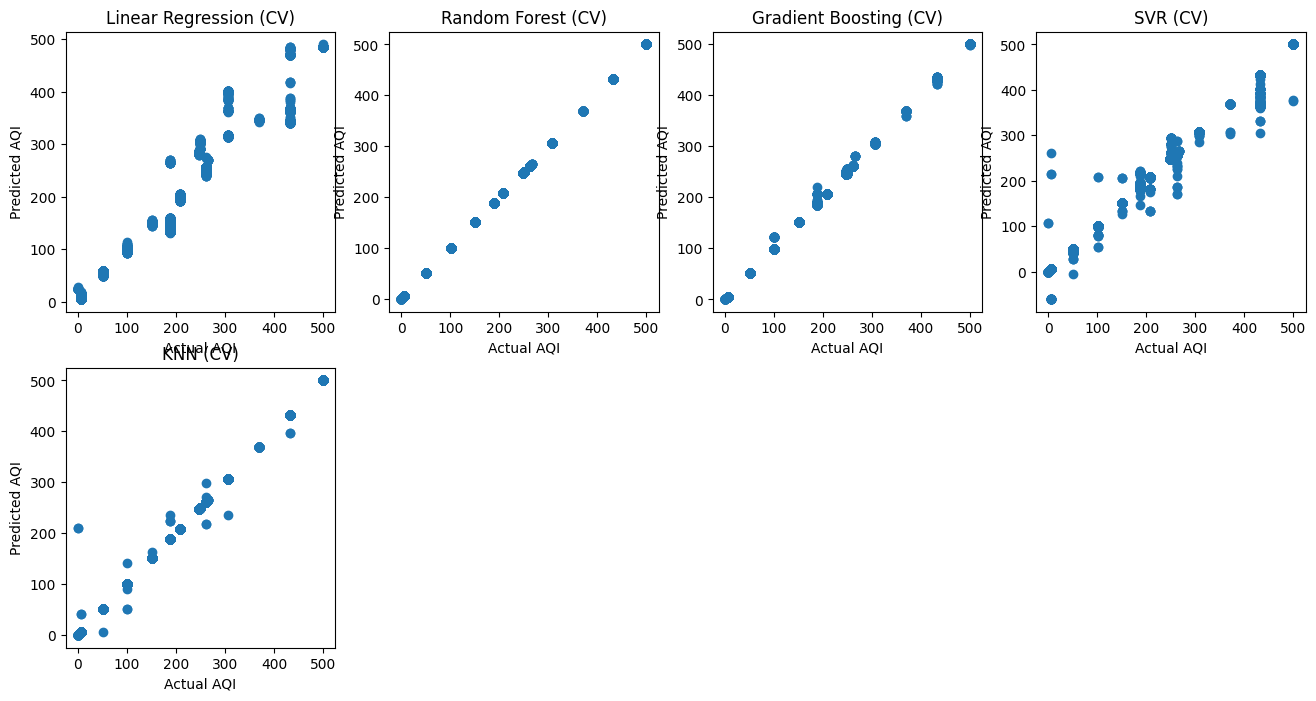

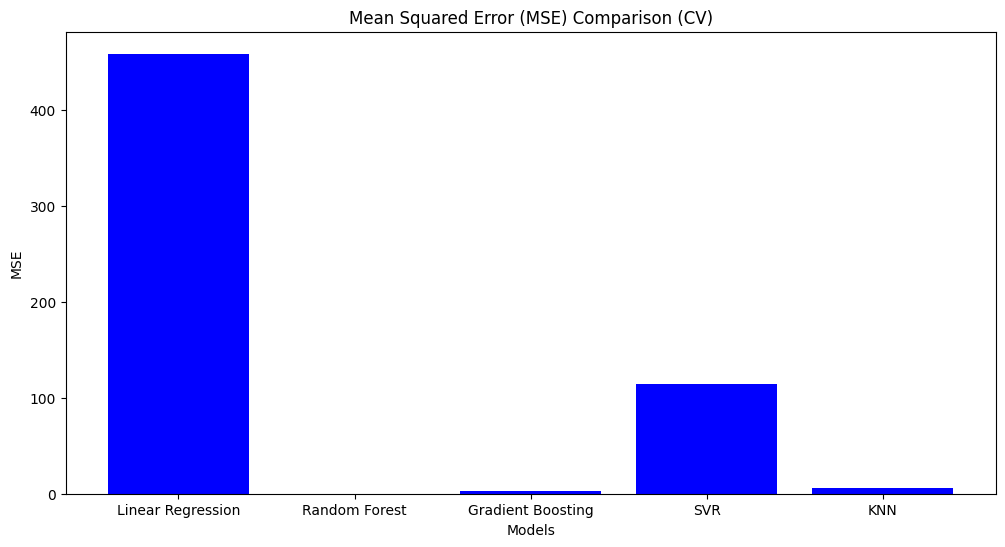

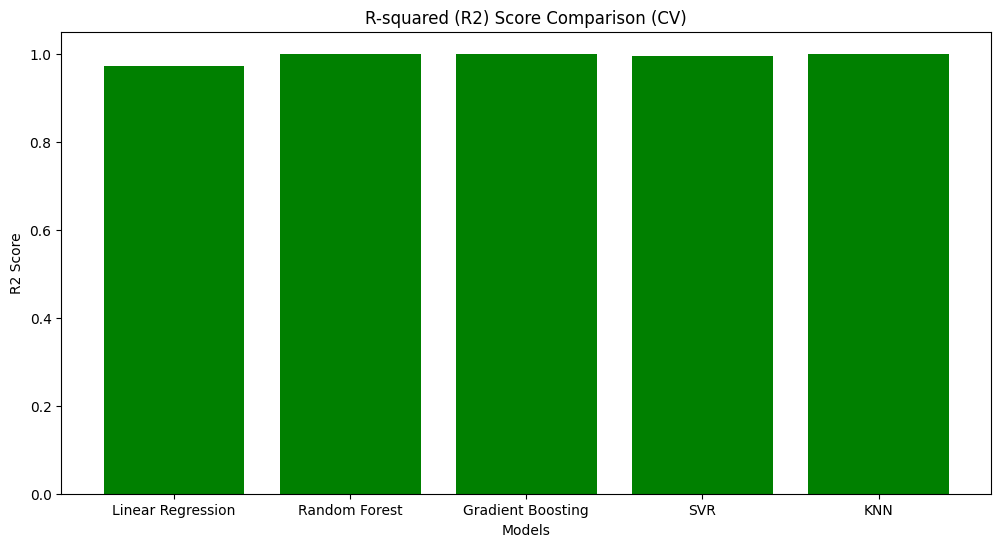

In [ ]:
# 1. Linear Regression with Cross-Validation:

linear_model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores_linear = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_mse_scores_linear = -cv_scores_linear

# Print cross-validation results
print('Cross-Validation Results (Linear Regression):')
print(f'Mean MSE: {cv_mse_scores_linear.mean():.4f}')
print(f'Standard Deviation MSE: {cv_mse_scores_linear.std():.4f}')

# Train the Linear Regression model on the entire training set
linear_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_linear_cv = linear_model.predict(X_test_scaled)

# Calculate R-squared for the test set
r2_linear_cv = r2_score(y_test, y_pred_linear_cv)

# Print test set results
print('\nTest Set Results (Linear Regression):')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear_cv):.4f}')
print(f'R-squared (R2) Score: {r2_linear_cv:.4f}')

# 2. Random Forest with Cross-Validation:

rf_model = RandomForestRegressor()

# Perform 5-fold cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_mse_scores_rf = -cv_scores_rf

# Print cross-validation results
print('\nCross-Validation Results (Random Forest):')
print(f'Mean MSE: {cv_mse_scores_rf.mean():.4f}')
print(f'Standard Deviation MSE: {cv_mse_scores_rf.std():.4f}')

# Train the Random Forest model on the entire training set
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_rf_cv = rf_model.predict(X_test_scaled)

# Calculate R-squared for the test set
r2_rf_cv = r2_score(y_test, y_pred_rf_cv)

# Print test set results
print('\nTest Set Results (Random Forest):')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf_cv):.4f}')
print(f'R-squared (R2) Score: {r2_rf_cv:.4f}')

# 3. Gradient Boosting with Cross-Validation:

gb_model = GradientBoostingRegressor()

# Perform 5-fold cross-validation
cv_scores_gb = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_mse_scores_gb = -cv_scores_gb

# Print cross-validation results
print('\nCross-Validation Results (Gradient Boosting):')
print(f'Mean MSE: {cv_mse_scores_gb.mean():.4f}')
print(f'Standard Deviation MSE: {cv_mse_scores_gb.std():.4f}')

# Train the Gradient Boosting model on the entire training set
gb_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_gb_cv = gb_model.predict(X_test_scaled)

# Calculate R-squared for the test set
r2_gb_cv = r2_score(y_test, y_pred_gb_cv)

# Print test set results
print('\nTest Set Results (Gradient Boosting):')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gb_cv):.4f}')
print(f'R-squared (R2) Score: {r2_gb_cv:.4f}')

# 4. SVR (Support Vector Regression) with Cross-Validation:

svr_model = SVR()

# Perform 5-fold cross-validation
cv_scores_svr = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_mse_scores_svr = -cv_scores_svr

# Print cross-validation results
print('\nCross-Validation Results (SVR):')
print(f'Mean MSE: {cv_mse_scores_svr.mean():.4f}')
print(f'Standard Deviation MSE: {cv_mse_scores_svr.std():.4f}')

# Train the SVR model on the entire training set
svr_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_svr_cv = svr_model.predict(X_test_scaled)

# Calculate R-squared for the test set
r2_svr_cv = r2_score(y_test, y_pred_svr_cv)

# Print test set results
print('\nTest Set Results (SVR):')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_svr_cv):.4f}')
print(f'R-squared (R2) Score: {r2_svr_cv:.4f}')

# 5. K-Nearest Neighbors (KNN) with Cross-Validation:

knn_model = KNeighborsRegressor()

# Perform 5-fold cross-validation
cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_mse_scores_knn = -cv_scores_knn

# Print cross-validation results
print('\nCross-Validation Results (KNN):')
print(f'Mean MSE: {cv_mse_scores_knn.mean():.4f}')
print(f'Standard Deviation MSE: {cv_mse_scores_knn.std():.4f}')

# Train the KNN model on the entire training set
knn_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_knn_cv = knn_model.predict(X_test_scaled)

# Calculate R-squared for the test set
r2_knn_cv = r2_score(y_test, y_pred_knn_cv)

# Print test set results
print('\nTest Set Results (KNN):')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_knn_cv):.4f}')
print(f'R-squared (R2) Score: {r2_knn_cv:.4f}')


# 7. Comparison: Scatter Plots for All Models:

plt.figure(figsize=(16, 8))

# Linear Regression
plt.subplot(2, 4, 1)
plt.scatter(y_test, y_pred_linear_cv)
plt.title('Linear Regression (CV)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')

# Random Forest
plt.subplot(2, 4, 2)
plt.scatter(y_test, y_pred_rf_cv)
plt.title('Random Forest (CV)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')

# Gradient Boosting
plt.subplot(2, 4, 3)
plt.scatter(y_test, y_pred_gb_cv)
plt.title('Gradient Boosting (CV)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')

# SVR
plt.subplot(2, 4, 4)
plt.scatter(y_test, y_pred_svr_cv)
plt.title('SVR (CV)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')

# KNN
plt.subplot(2, 4, 5)
plt.scatter(y_test, y_pred_knn_cv)
plt.title('KNN (CV)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')


# 8. Comparison: MSE and R2 Bar Plot for All Models:

# Collect MSE and R2 values
mse_values_cv = [cv_mse_scores_linear.mean(), cv_mse_scores_rf.mean(), cv_mse_scores_gb.mean(),
                  cv_mse_scores_svr.mean(), cv_mse_scores_knn.mean()]
r2_values_cv = [r2_linear_cv, r2_rf_cv, r2_gb_cv, r2_svr_cv, r2_knn_cv]
model_names_cv = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'KNN']

# Plot bar chart for MSE
plt.figure(figsize=(12, 6))
plt.bar(model_names_cv, mse_values_cv, color='blue')
plt.title('Mean Squared Error (MSE) Comparison (CV)')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

# Plot bar chart for R2
plt.figure(figsize=(12, 6))
plt.bar(model_names_cv, r2_values_cv, color='green')
plt.title('R-squared (R2) Score Comparison (CV)')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()



# Comparison of models before and after Cross Validation

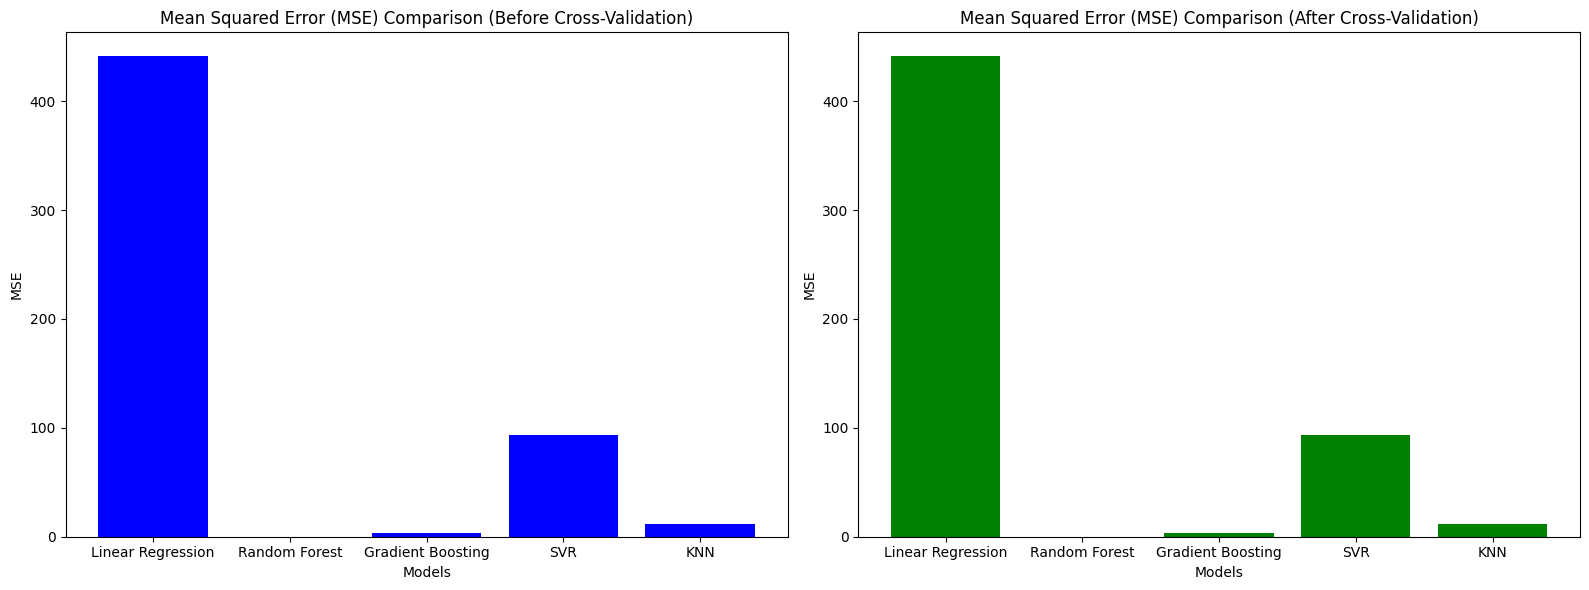

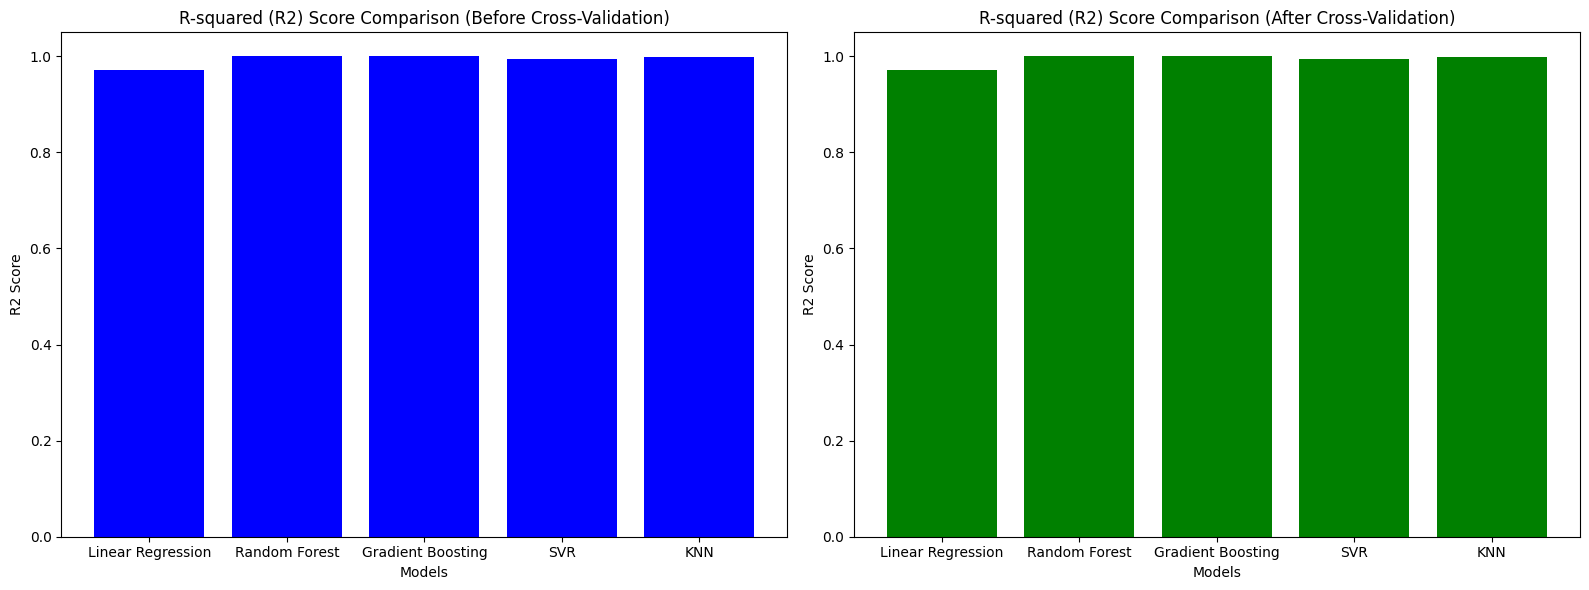

In [ ]:
#3. Comparison: MSE and R2 Bar Plot for All Models (Before and After Cross-Validation):

# Collect MSE and R2 values (Before Cross-Validation)
mse_values_before_cv = [mean_squared_error(y_test, y_pred_linear), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_gb),
                        mean_squared_error(y_test, y_pred_svr), mean_squared_error(y_test, y_pred_knn)]

r2_values_before_cv = [r2_linear, r2_rf, r2_gb, r2_svr, r2_knn]

# Collect MSE and R2 values (After Cross-Validation)
mse_values_after_cv = [mean_squared_error(y_test, y_pred_linear_cv), mean_squared_error(y_test, y_pred_rf_cv), mean_squared_error(y_test, y_pred_gb_cv),
                       mean_squared_error(y_test, y_pred_svr_cv), mean_squared_error(y_test, y_pred_knn_cv)]

r2_values_after_cv = [r2_linear_cv, r2_rf_cv, r2_gb_cv, r2_svr_cv, r2_knn_cv]

model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'KNN']

# Plot bar chart for MSE (Before and After Cross-Validation)
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values_before_cv, color='blue')
plt.title('Mean Squared Error (MSE) Comparison (Before Cross-Validation)')
plt.xlabel('Models')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(model_names, mse_values_after_cv, color='green')
plt.title('Mean Squared Error (MSE) Comparison (After Cross-Validation)')
plt.xlabel('Models')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

# Plot bar chart for R2 (Before and After Cross-Validation)
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, r2_values_before_cv, color='blue')
plt.title('R-squared (R2) Score Comparison (Before Cross-Validation)')
plt.xlabel('Models')
plt.ylabel('R2 Score')

plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values_after_cv, color='green')
plt.title('R-squared (R2) Score Comparison (After Cross-Validation)')
plt.xlabel('Models')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()
